In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import util.plot as pl

TUR不等式

$\sigma \geq 2\frac{R^2}{Var(R)^2}$

の確認

# 変更点
sample stepにパラメーターdtを追加

$x+(-x+\frac{1}{\sqrt{\beta_t}}(x - \frac{\alpha_t}{\sqrt{\bar{\alpha_t}}} \epsilon ))dt+\sqrt{\beta_t}\sqrt{dt}$

とした。生成過程をランジュバン風に書くと

$\dot{x}=Adt+\sqrt{\beta_t}dw$

$A=-x+\frac{1}{\sqrt{\beta_t}}(x - \frac{\alpha_t}{\sqrt{\bar{\alpha_t}}} \epsilon )$

学習ステップ係数を小さくして学習過程を見やすくした

## 平均分散の計算方法

ストラトノビッチ積を使ったのパス平均、分散

$ave_f=\sum f(x_t,t)\circ dx_t$ (V)

に加え

$ave_f=<J_f>=<f(AP-D\nabla P)>=\int dx P(x)f(x)(A(x)-Dscore(x)) =: <f*F>$ (A)

$ave_f=\int dx P(x)(f(x)A(x)+D\nabla f(x))$ (B)

を取得した。分散は(A),(B)では

$var_f:=<fDf>$

(A)では$f=A(x)-D\nabla log p(x)=A(x)-Dscore(x)$を代入してTURの等式条件を確認した


## 計算した量Rの一覧

In [2]:
p=False
funcs=[]

with open("train.py") as fp:
    ls=fp.readlines()
    for l in ls:
        if(p):
            ll=l.replace(" ","").replace("),",")").replace("\n","").replace(",","@").replace("tdot(","")
            ll=ll.replace("_f","").replace("tsum","sum").replace("tmean","mean")
            ll=ll.replace("xd","dx").replace("xe","x").replace("xe","x^").replace(")","")
            funcs.append(ll)            
        if("fs=[" in l and "dfs" not in l):
            p=True
        elif("]" in l):
            p=False
            
for f in funcs:
    print(f)

tflatten(torch.ones(x.shape.cuda(
xf@
-xf2@
x@
x2@
F
]


In [3]:
TUR_log=pd.read_csv("TUR_log_skip20sample50epoch5_linear_lr1e-05_DDPM.csv",index_col=False)
TUR_log

epoch  gen_step     TUR_lhs  (Ai-D*score)^2      score        Ai  \
0        0         0   59.647954        0.011808 -39.414353  1.057768   
1        0         1   58.479375        0.011441   8.676975  0.511813   
2        0         2   59.223413        0.011245 -23.037585  0.857802   
3        0         3   53.348726        0.010033 -57.350713  1.288320   
4        0         4   55.914390        0.009313 -31.832622  0.946040   
..     ...       ...         ...             ...        ...       ...   
120      4        20   89.550557        0.003768 -68.694888  1.340732   
121      4        21  112.455010        0.003737 -50.892002  1.053415   
122      4        22  144.580176        0.003772 -51.503247  1.032003   
123      4        23  203.827148        0.003688 -88.381533  1.581395   
124      4        24  385.116133        0.003638 -99.640449  1.738074   

            D    mean.0  meanA(F).0  meanB(df).0  ...  rhsB(df).4    mean.5  \
0    0.010000 -0.695564    1.534411     0.804578  ...    0.019852  0.000179   
1    0.009601 -0.195810    0.649160     0.429891  ...    0.001569  0.007585   
2    0.009202  0.767459    0.517471     0.368003  ...    0.008917  0.003048   
3    0.008804  0.061262    0.554133     0.404389  ...    0.000368 -0.004099   
4    0.008405 -0.139268    0.435893     0.319950  ...    0.037591  0.003152   
..        ...       ...         ...          ...  ...         ...       ...   
120  0.002024  0.645577    0.781131     0.639558  ...    0.023187  0.049724   
121  0.001625  0.184898    0.621908     0.537422  ...    0.000472  0.063058   
122  0.001226  0.283345    0.634716     0.565393  ...    0.479078  0.066117   
123  0.000828  0.757163    0.639844     0.588385  ...    0.373192  0.069409   
124  0.000429  0.486266    0.596257     0.569289  ...    0.687964  0.078381   

     meanA(F).5  meanB(df).5     var.5    varD.5       rhs.5   rhsA(F).5  \
0      0.289639     0.159883  0.003624  0.002896    0.000018   57.927773   
1      0.306469     0.162821  0.001623  0.002942    0.070897   63.839775   
2      0.256690     0.132641  0.002048  0.002362    0.009073   55.787689   
3      0.245709     0.129549  0.001541  0.002163    0.021814   55.820091   
4      0.229585     0.122642  0.002073  0.001930    0.009585   54.631725   
..          ...          ...       ...       ...         ...         ...   
120    0.090314     0.073244  0.000236  0.000183   20.994478   89.240692   
121    0.092168     0.077718  0.000212  0.000150   37.553333  113.420631   
122    0.089530     0.078615  0.000115  0.000110   75.989365  145.998901   
123    0.087641     0.080276  0.000059  0.000073  164.161072  211.782227   
124    0.084839     0.081020  0.000051  0.000036  240.027145  395.651855   

     rhsB(df).5  Unnamed: 55  
0     17.651430          NaN  
1     18.019394          NaN  
2     14.896281          NaN  
3     15.517365          NaN  
4     15.589721          NaN  
..          ...          ...  
120   58.694611          NaN  
121   80.644302          NaN  
122  112.570427          NaN  
123  177.681412          NaN  
124  360.833282          NaN  

[125 rows x 56 columns]

In [4]:
epochs=4
generate_num=25

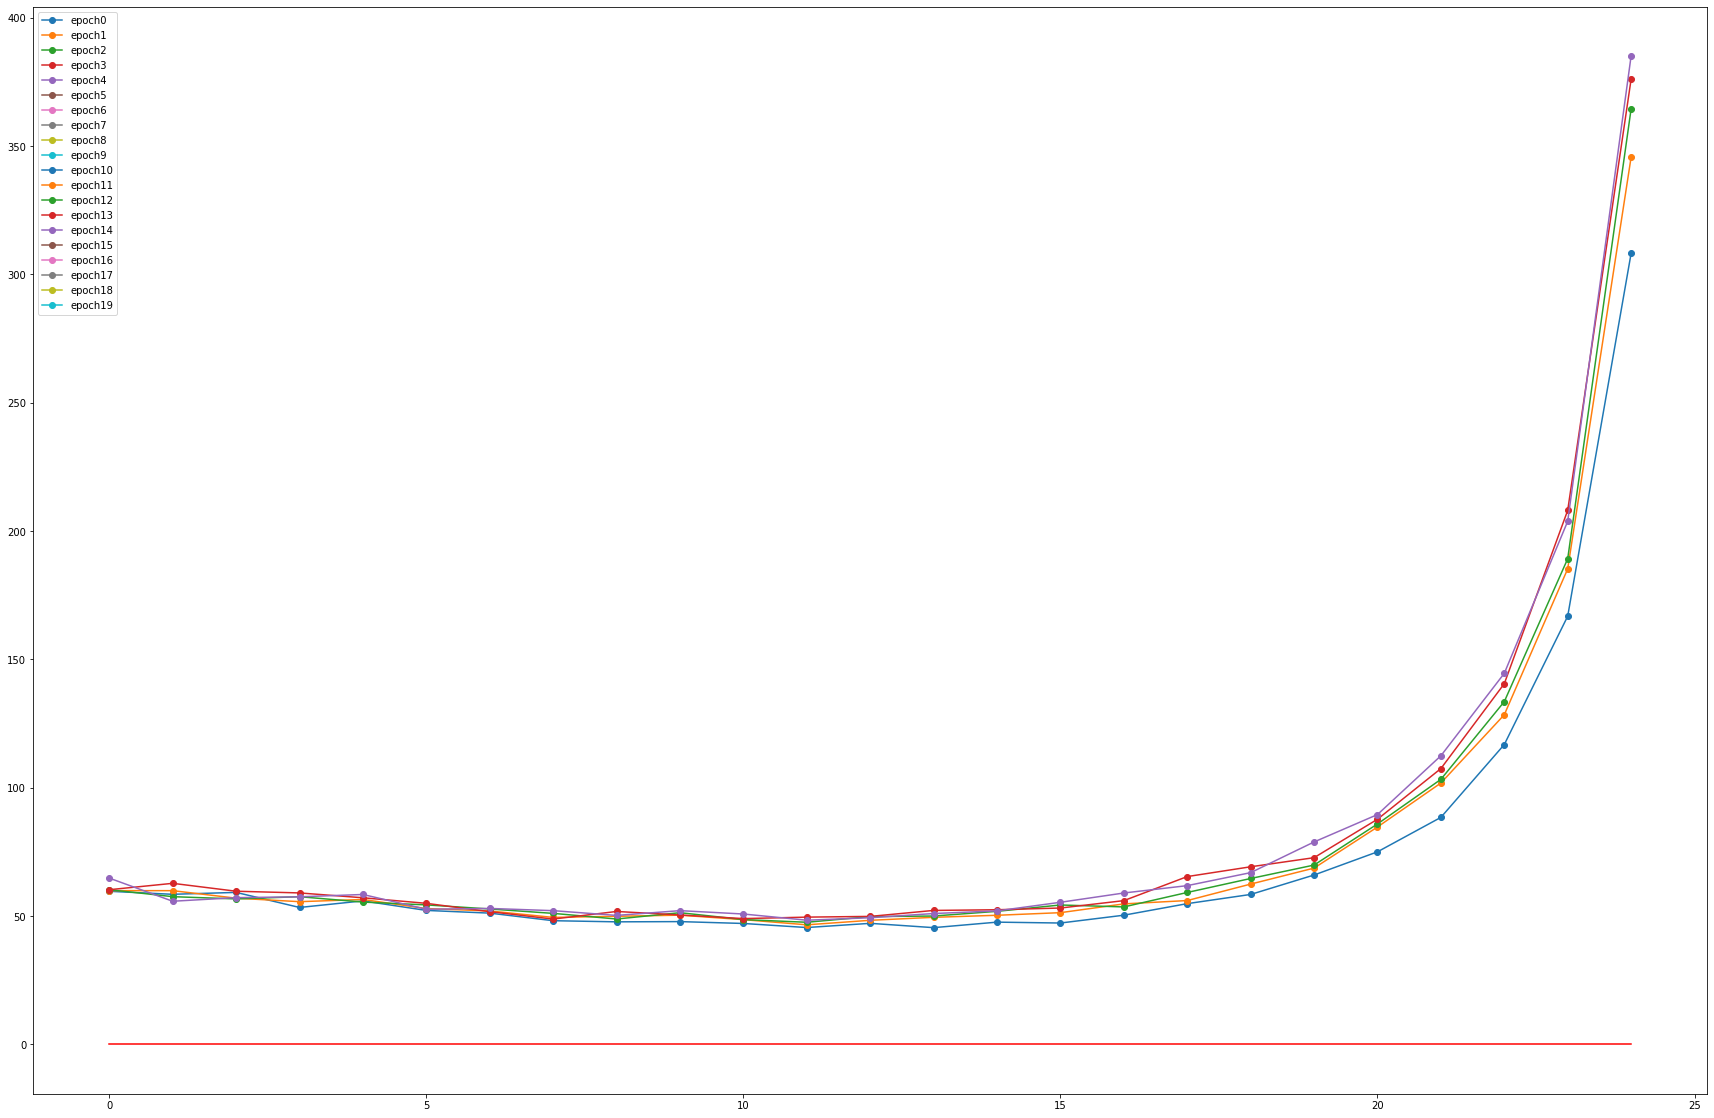

In [5]:
pl.plot_generates(TUR_log["TUR_lhs"],generate_num=generate_num)

## σ/(2ave^2/var)

0:tflatten(torch.ones(x.shape.cuda(


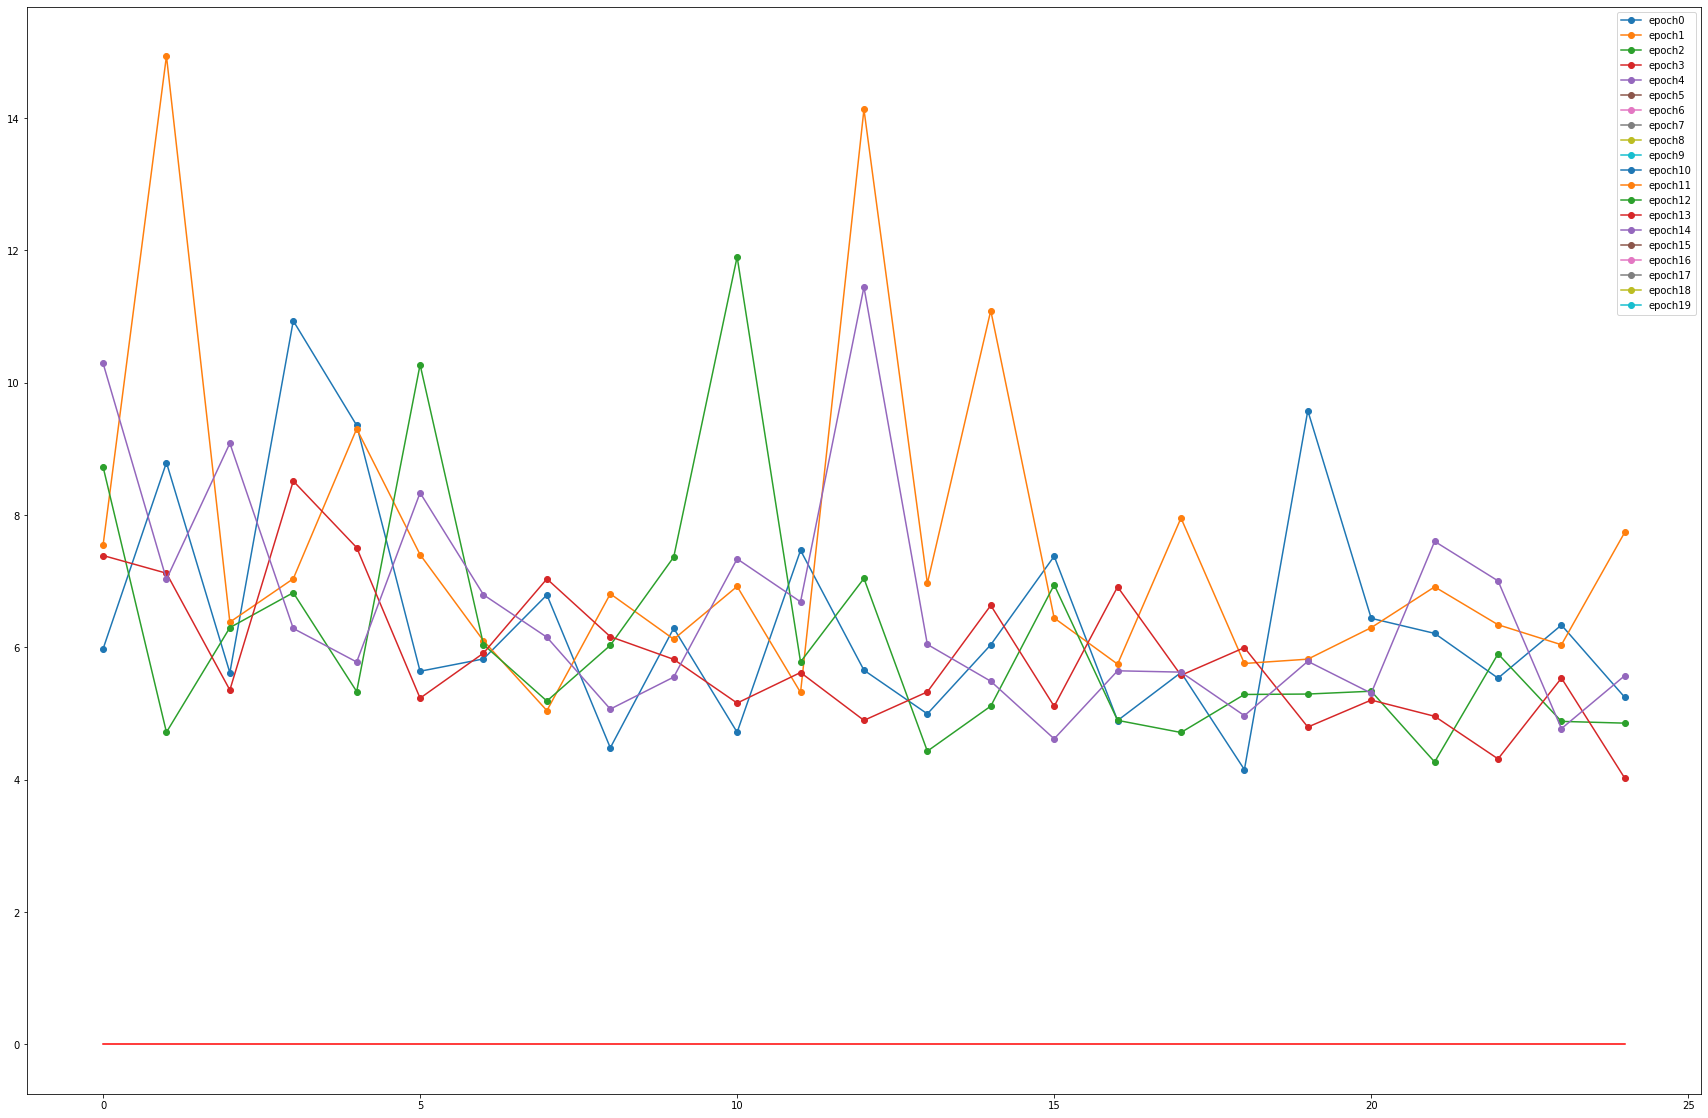

1:xf@


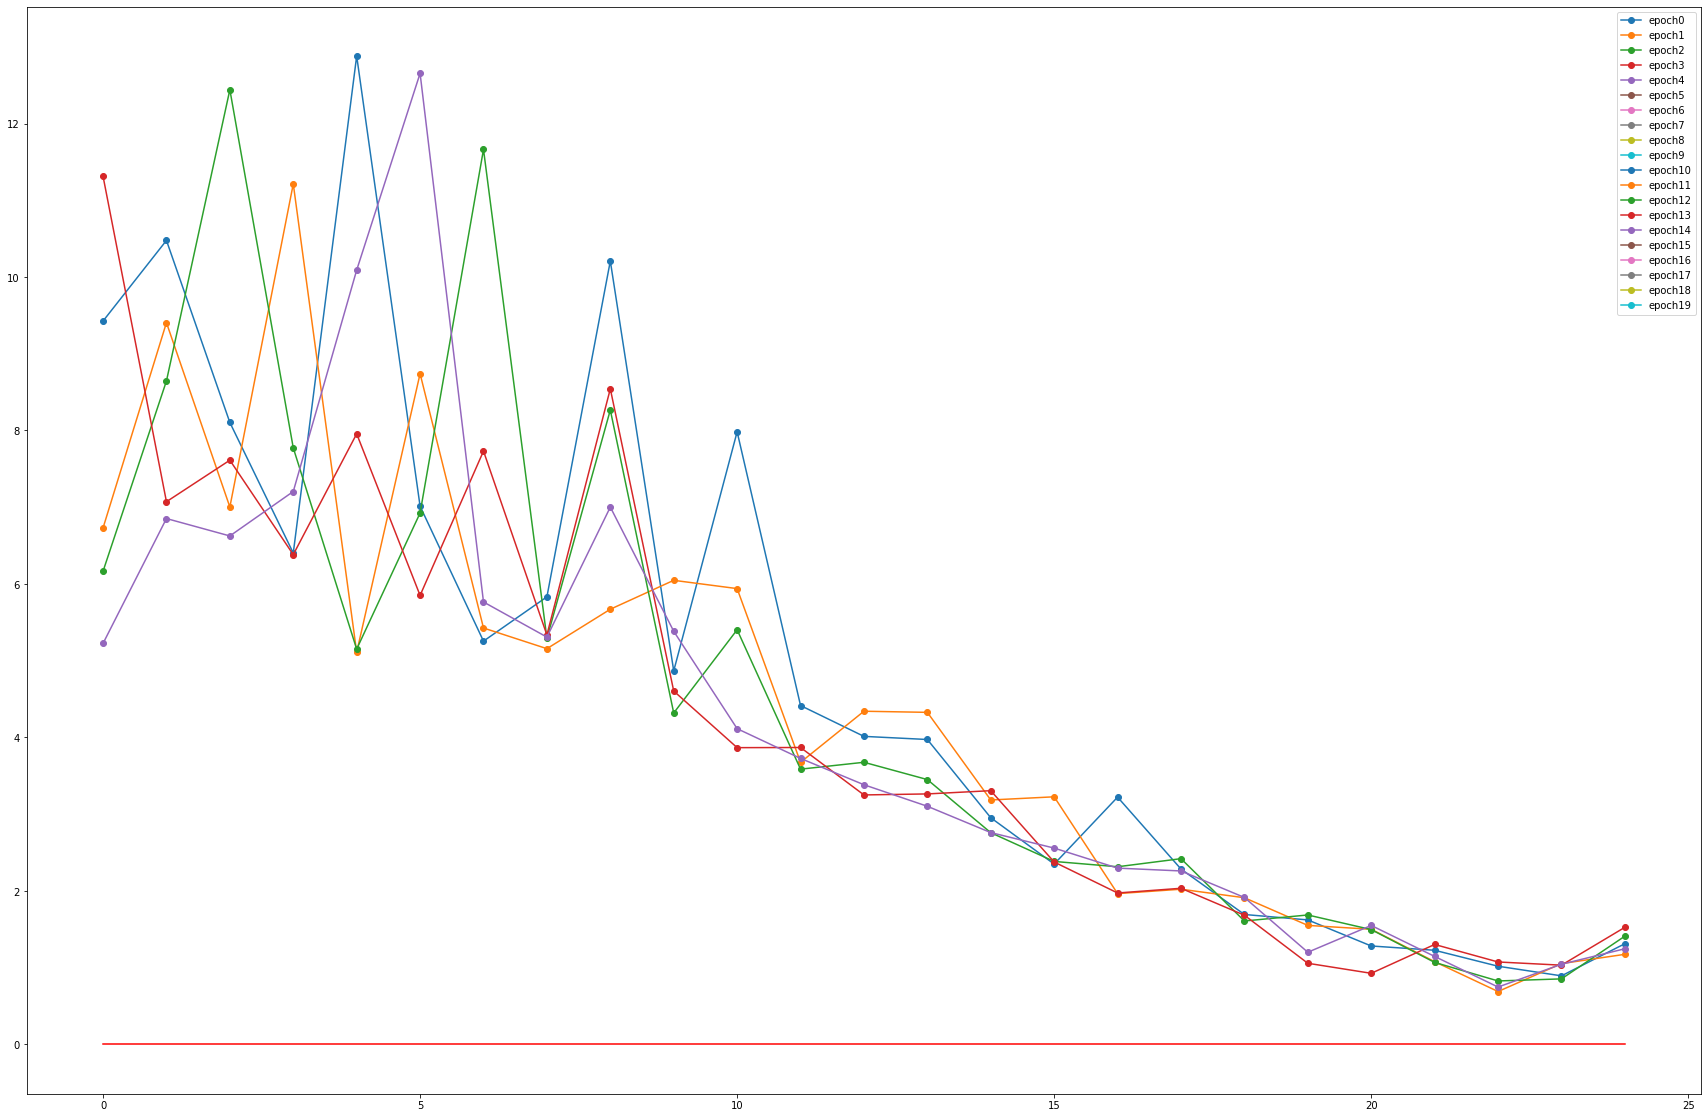

2:-xf2@


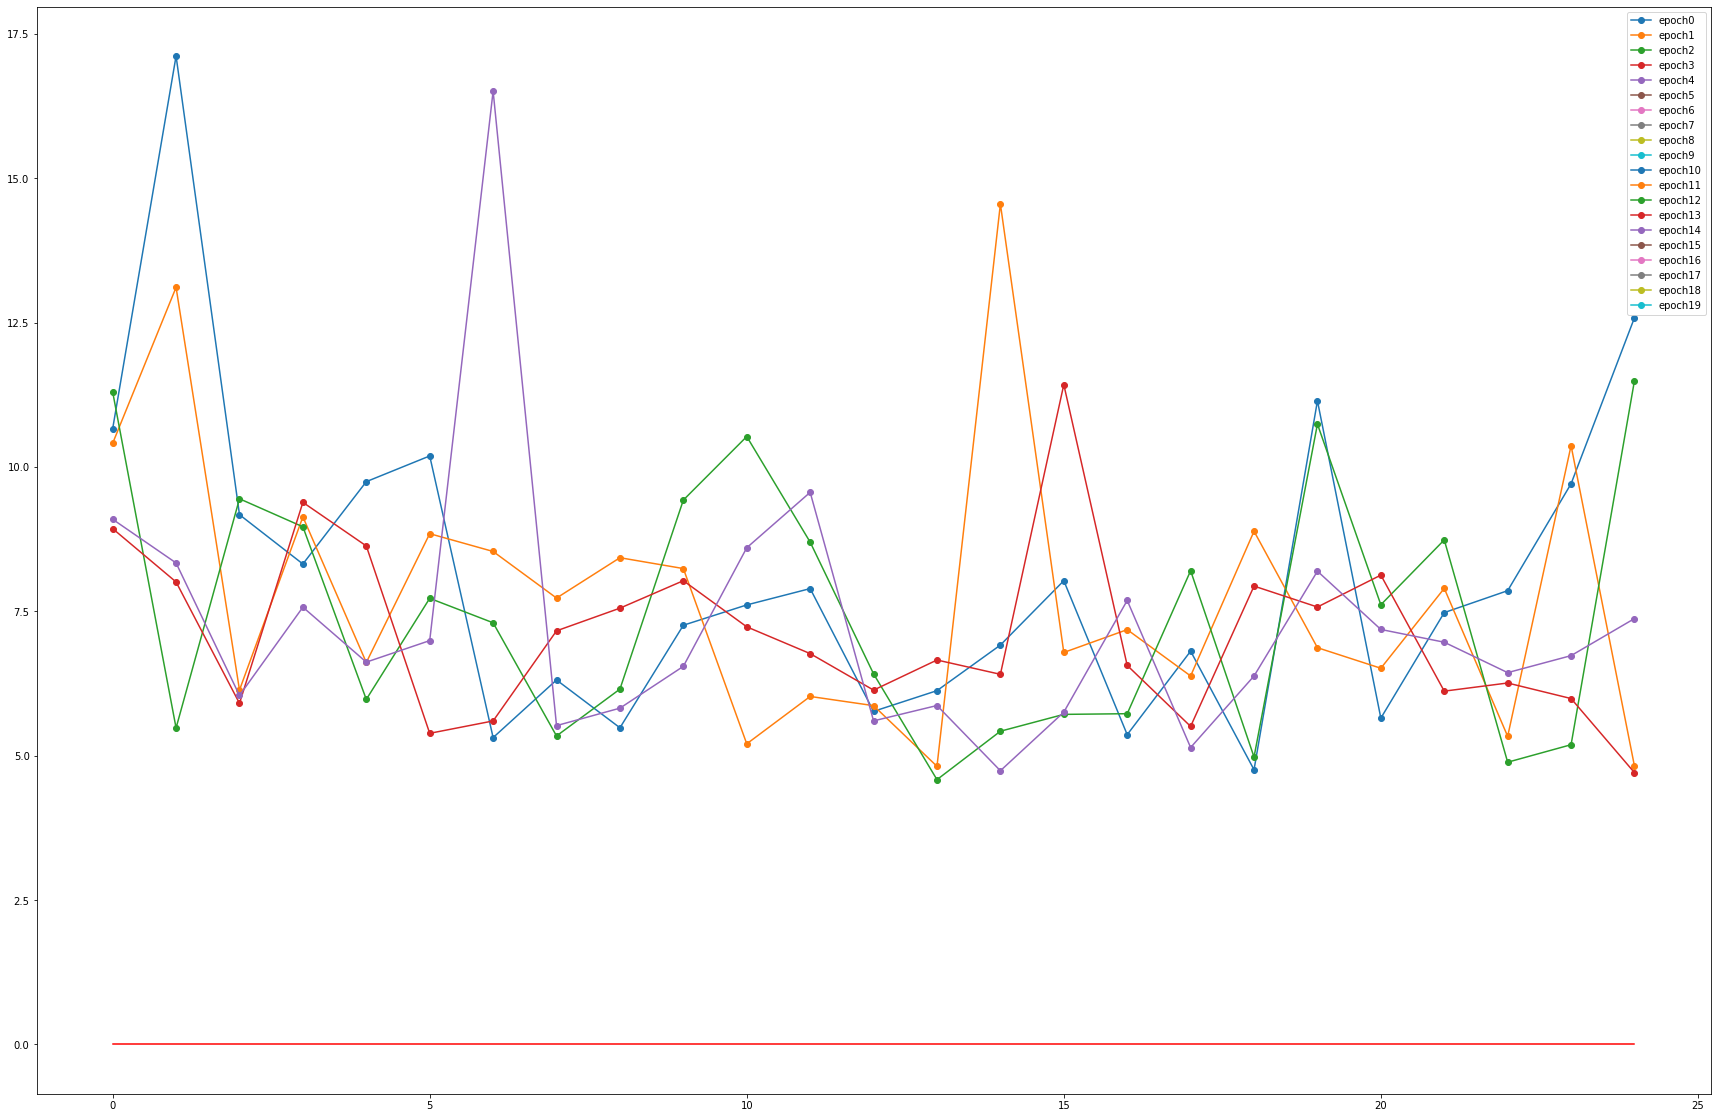

3:x@


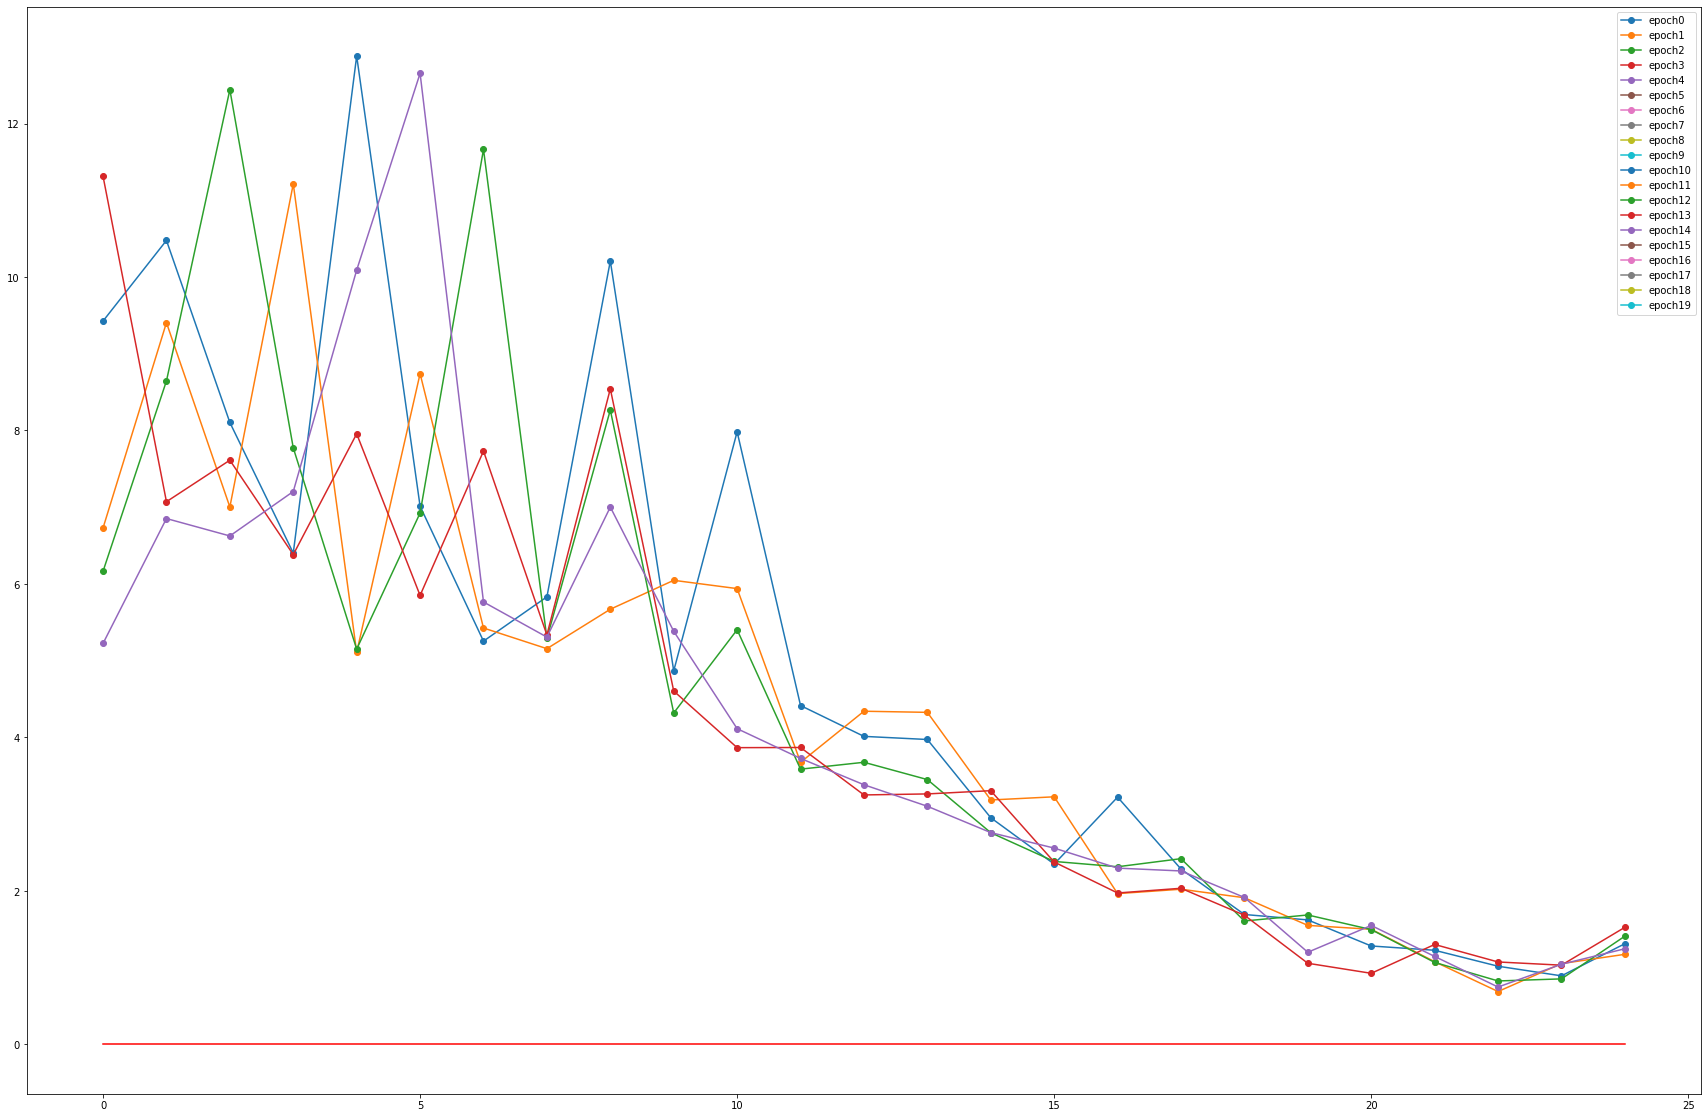

4:x2@


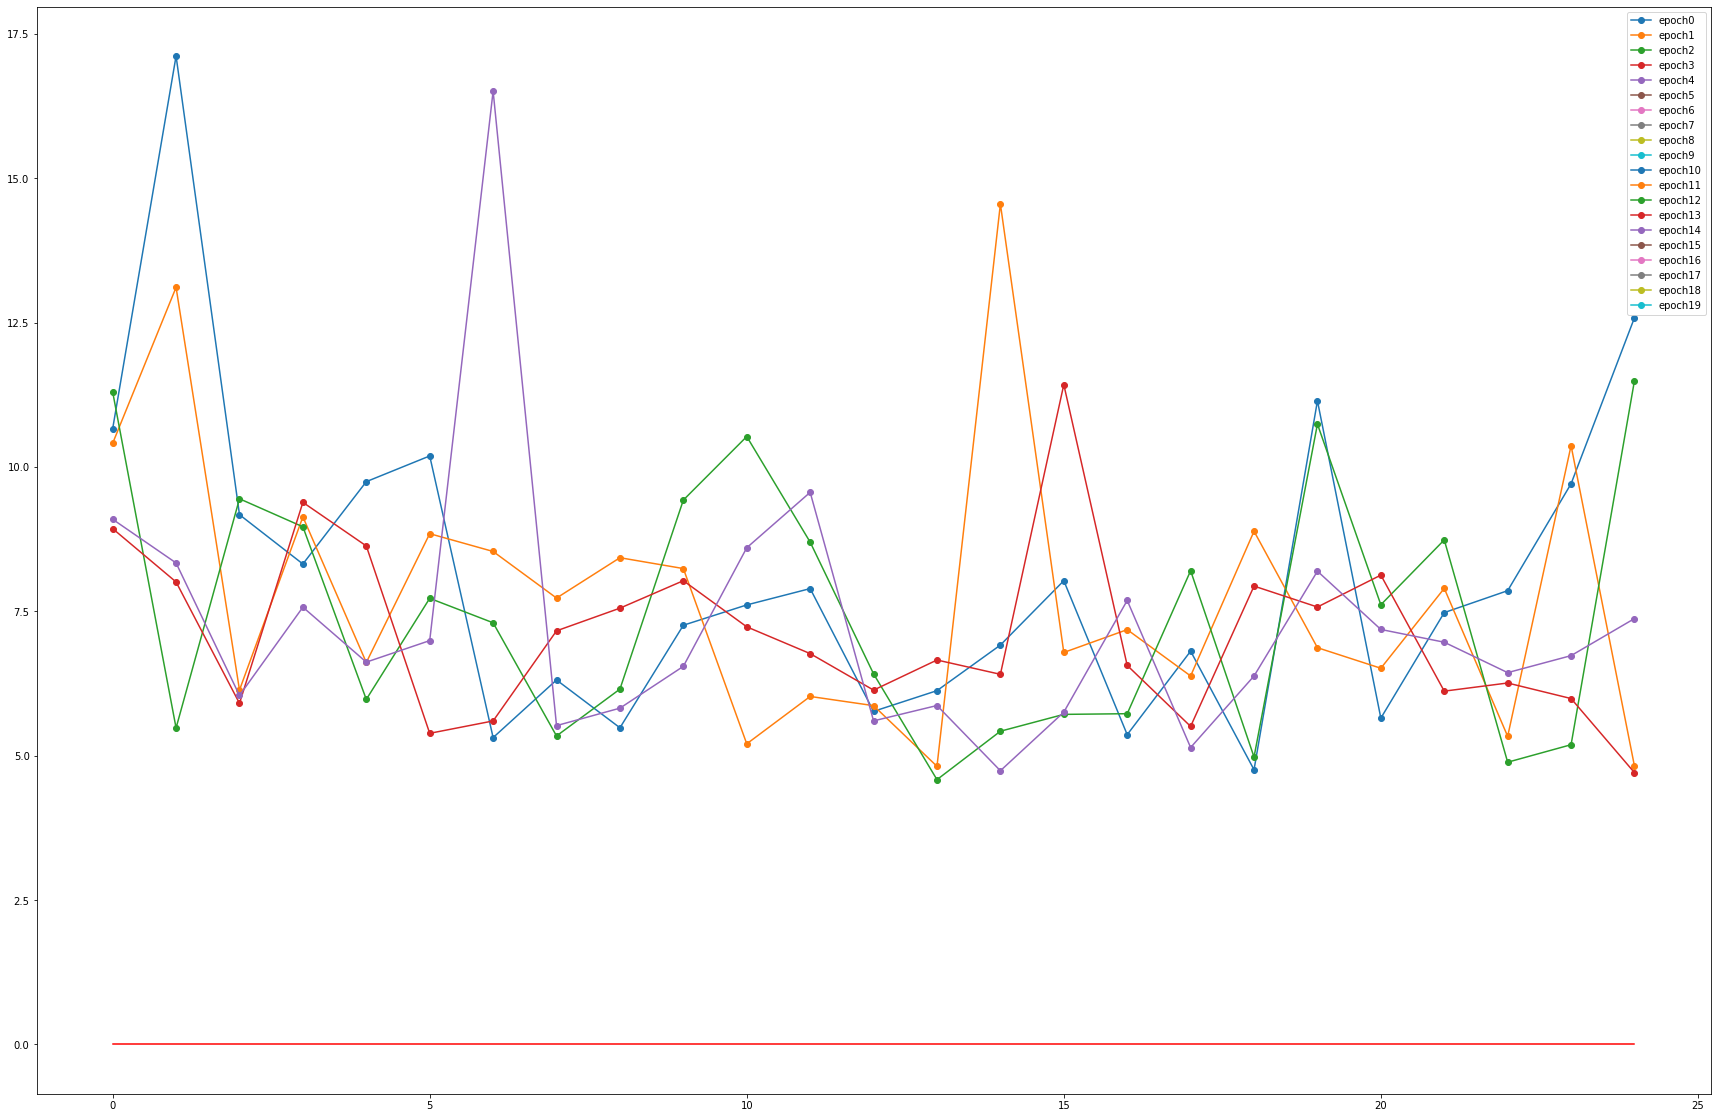

5:F


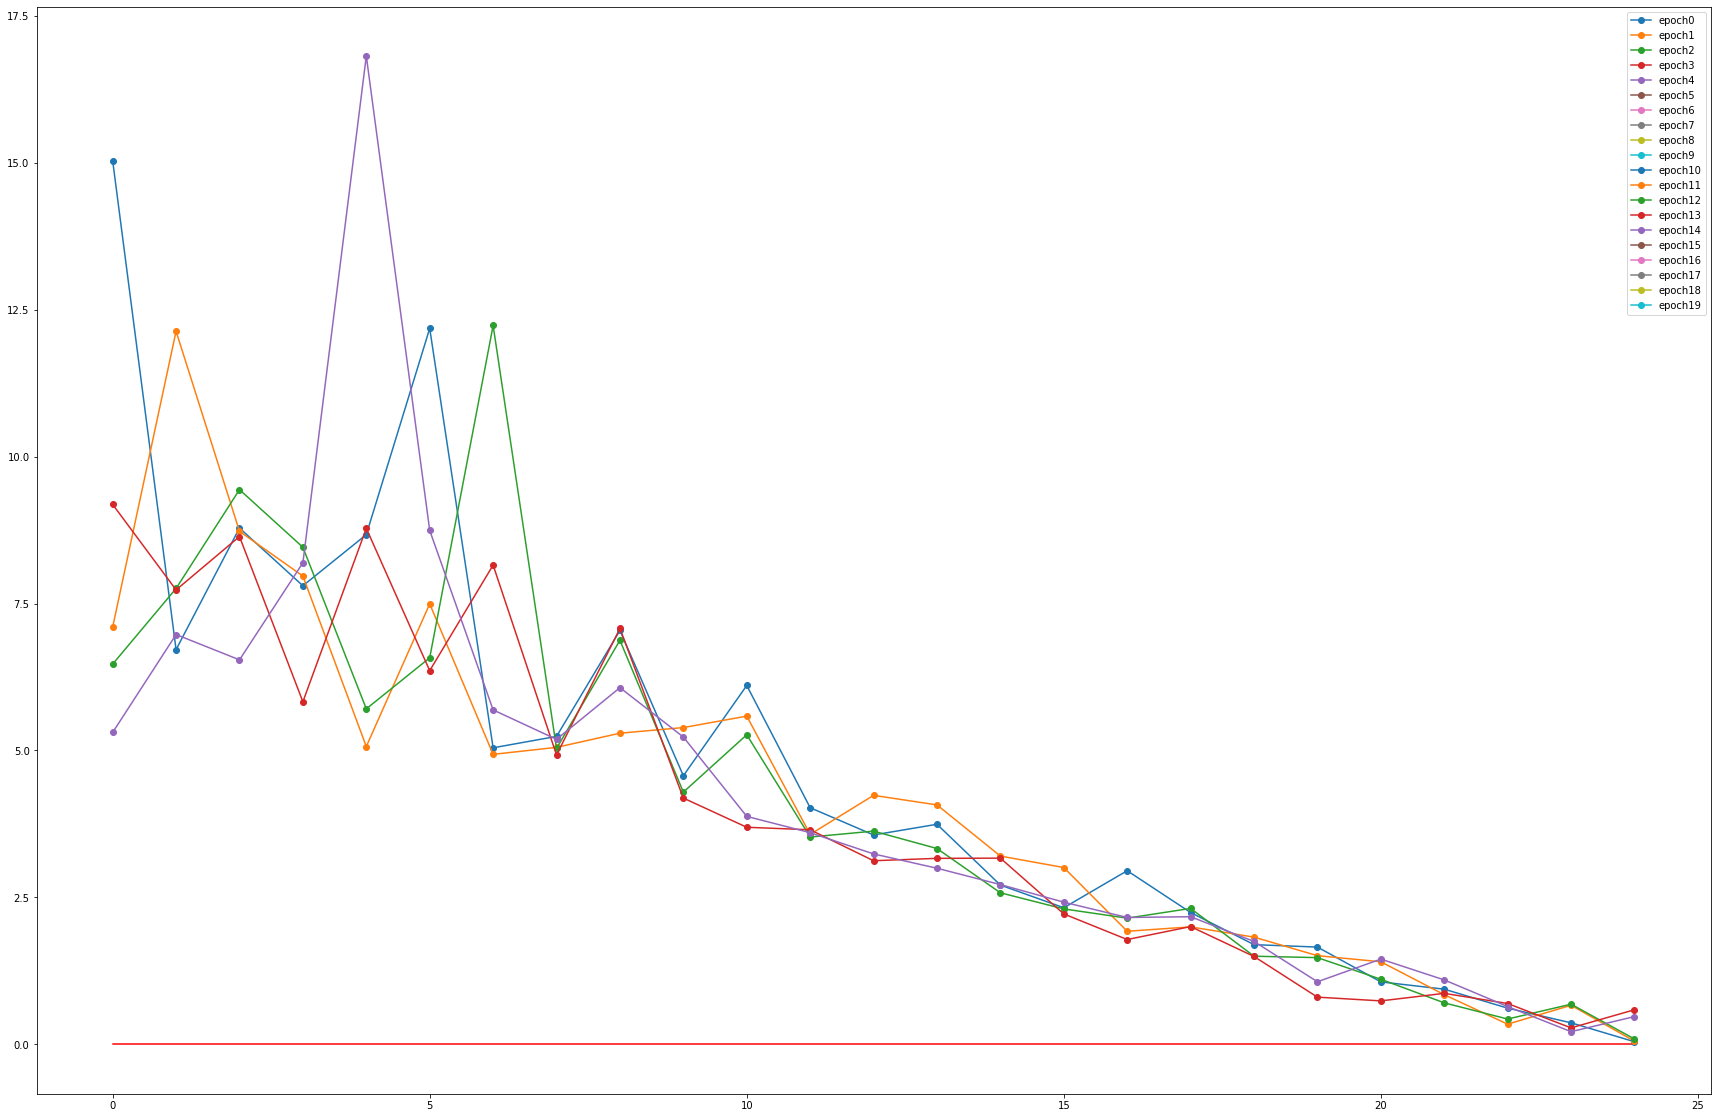

In [6]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["TUR_lhs"]/TUR_log["rhs."+str(i)],generate_num=generate_num)
    plt.show()

0:tflatten(torch.ones(x.shape.cuda(


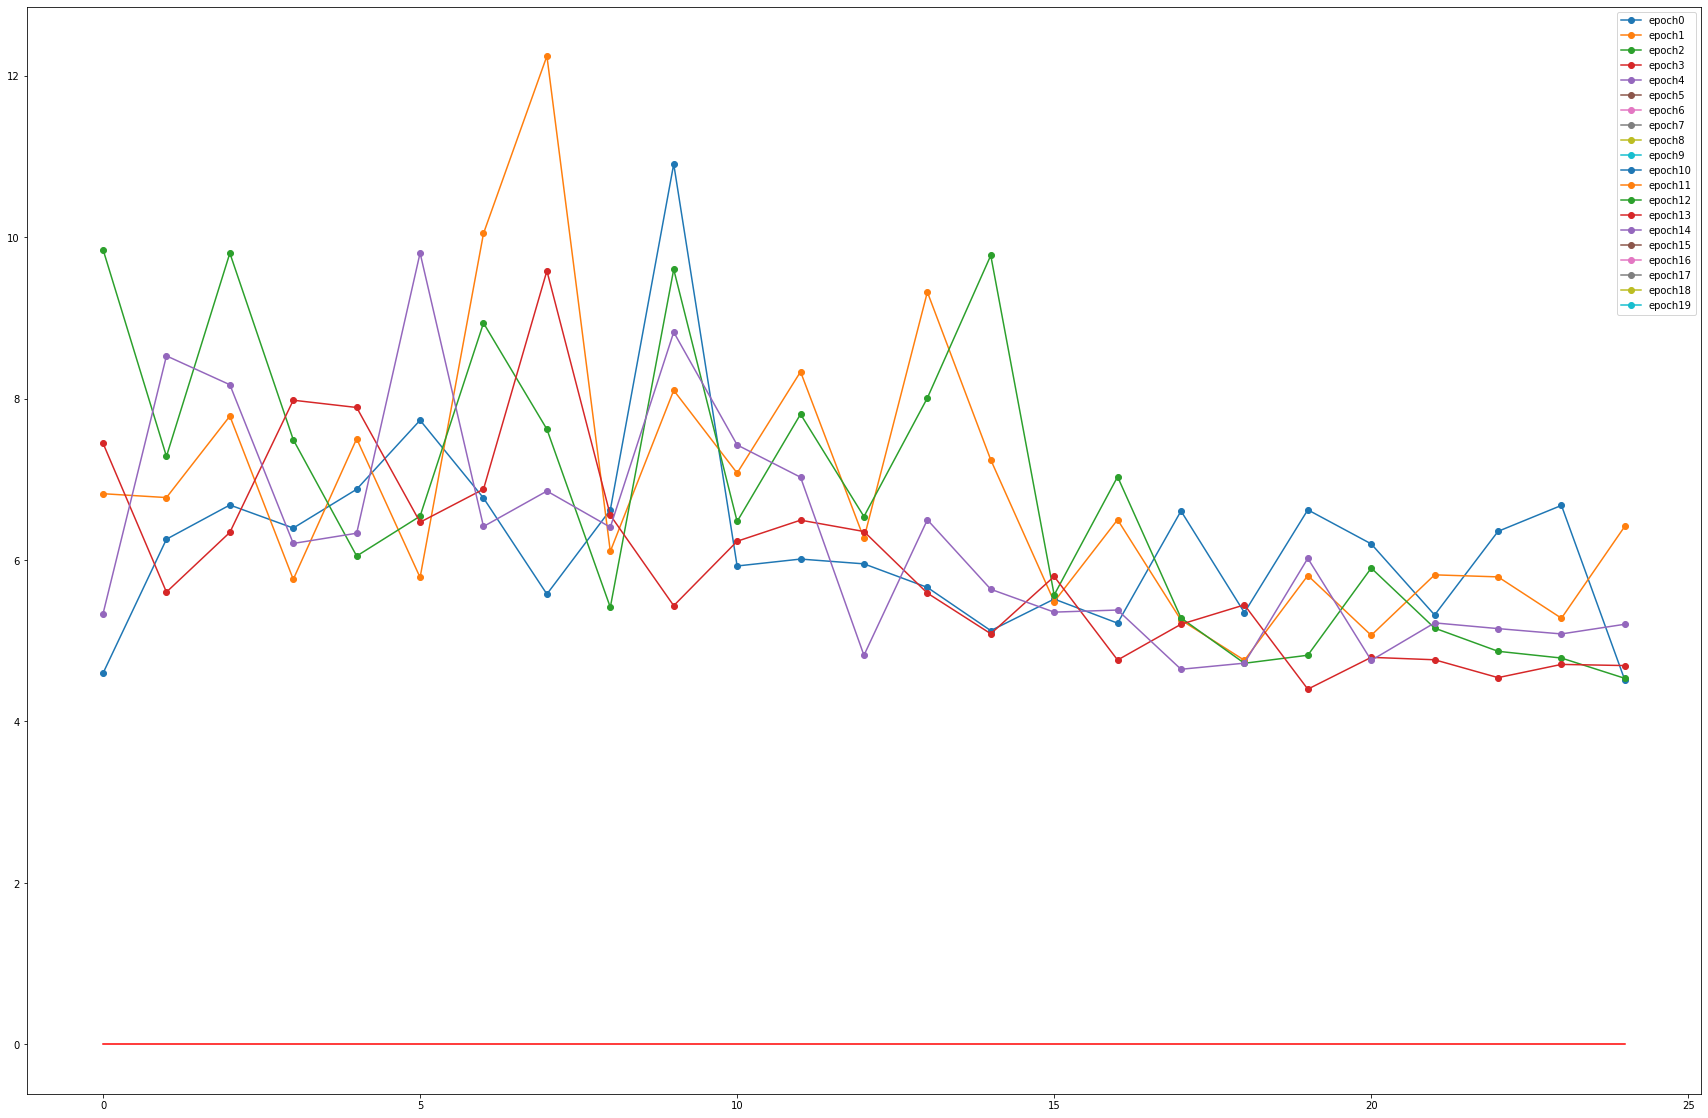

1:xf@


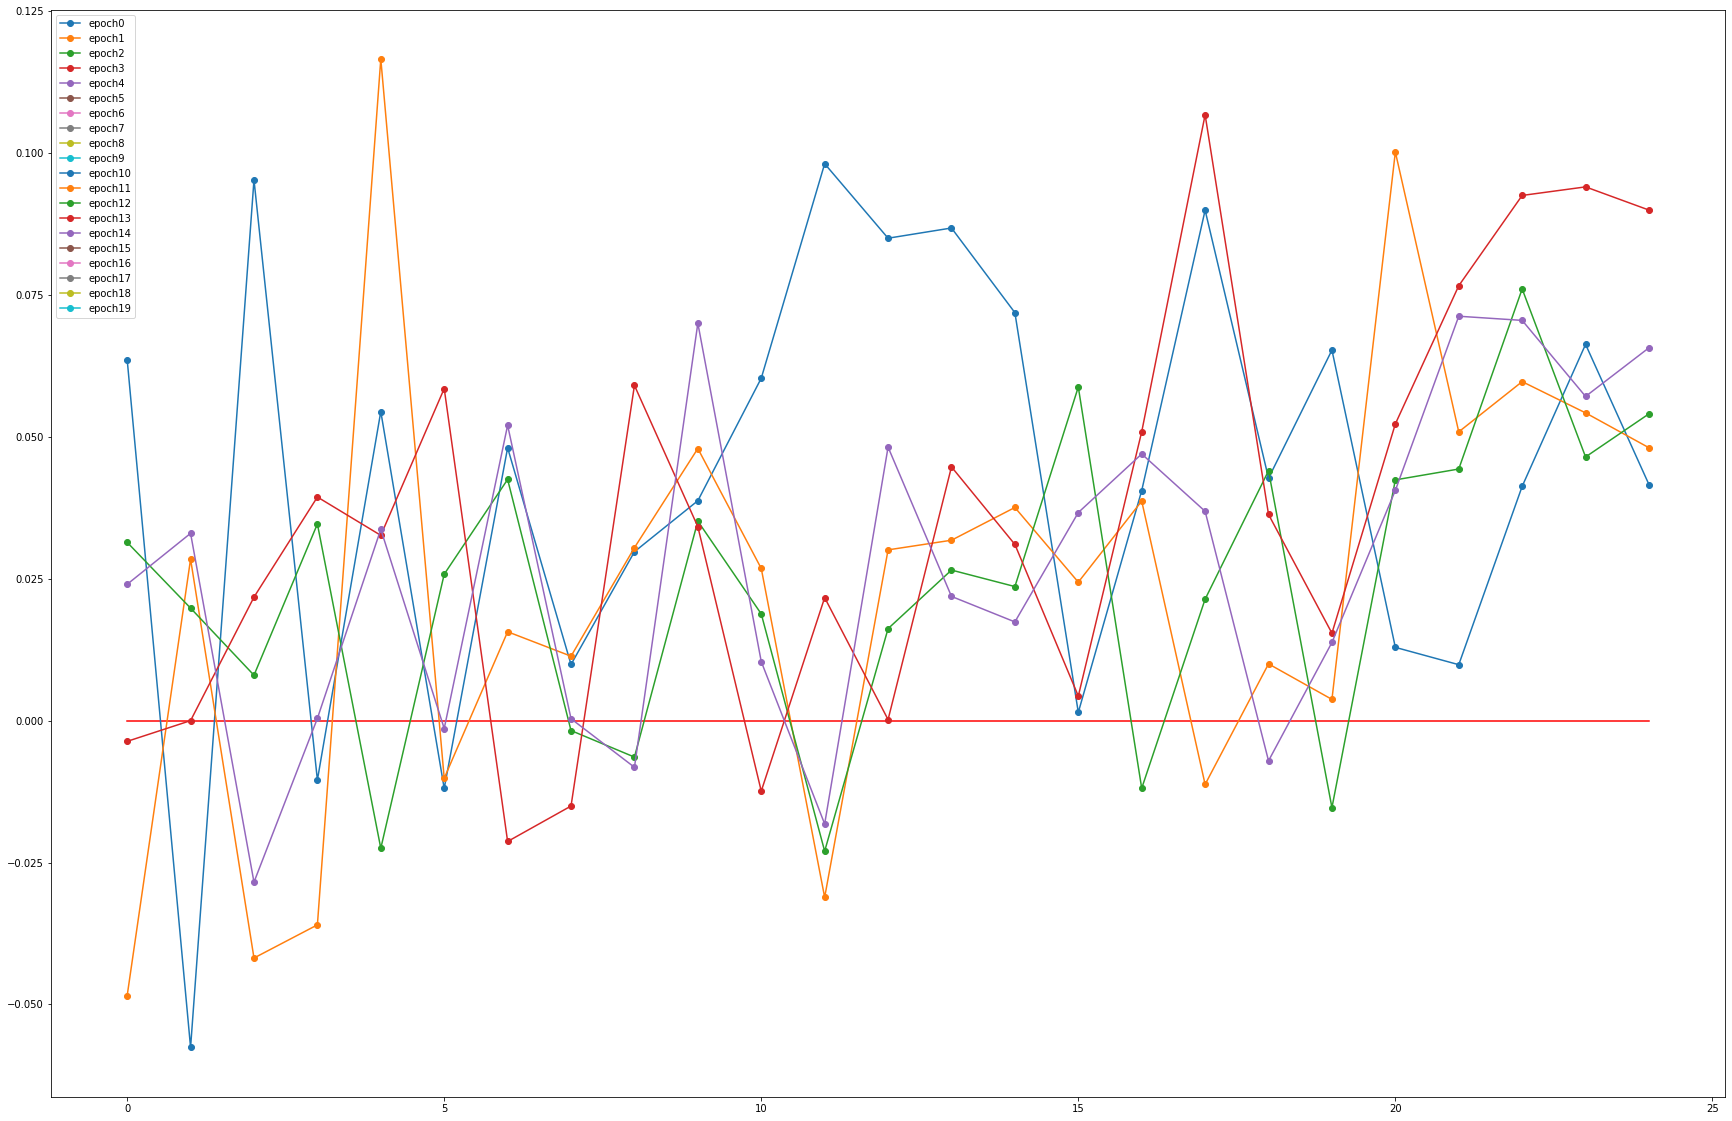

2:-xf2@


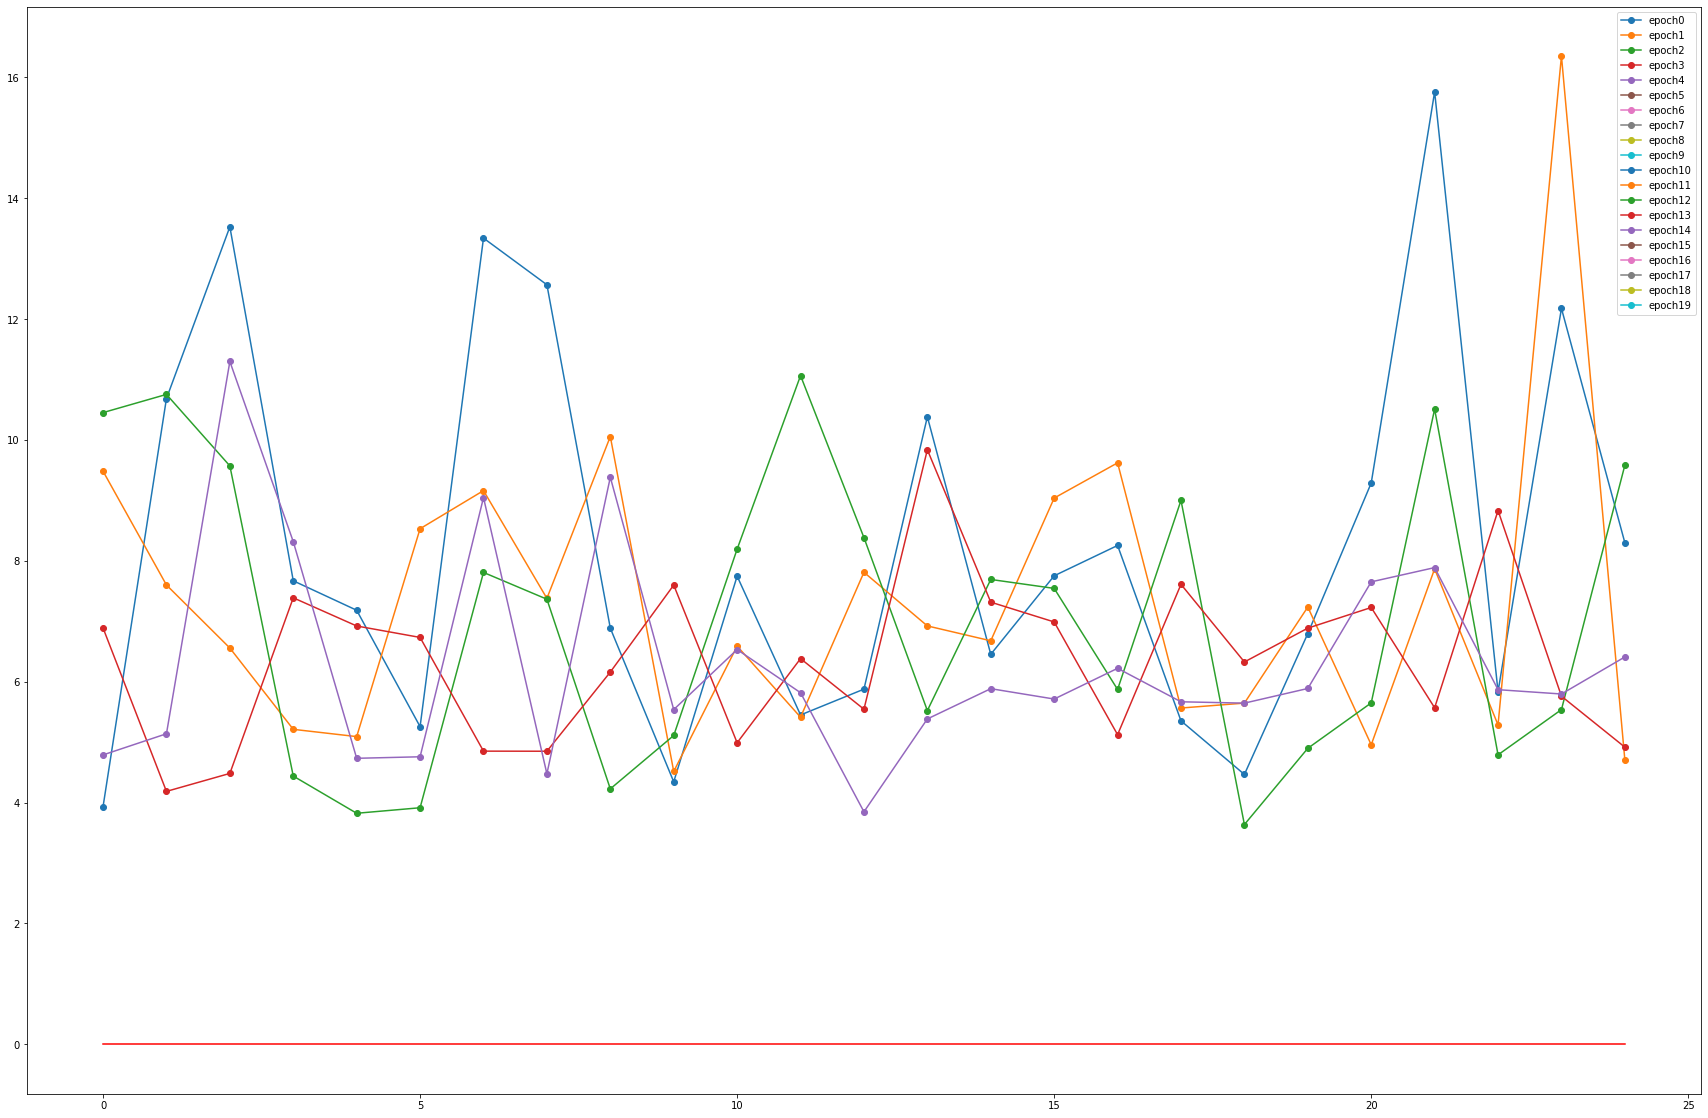

3:x@


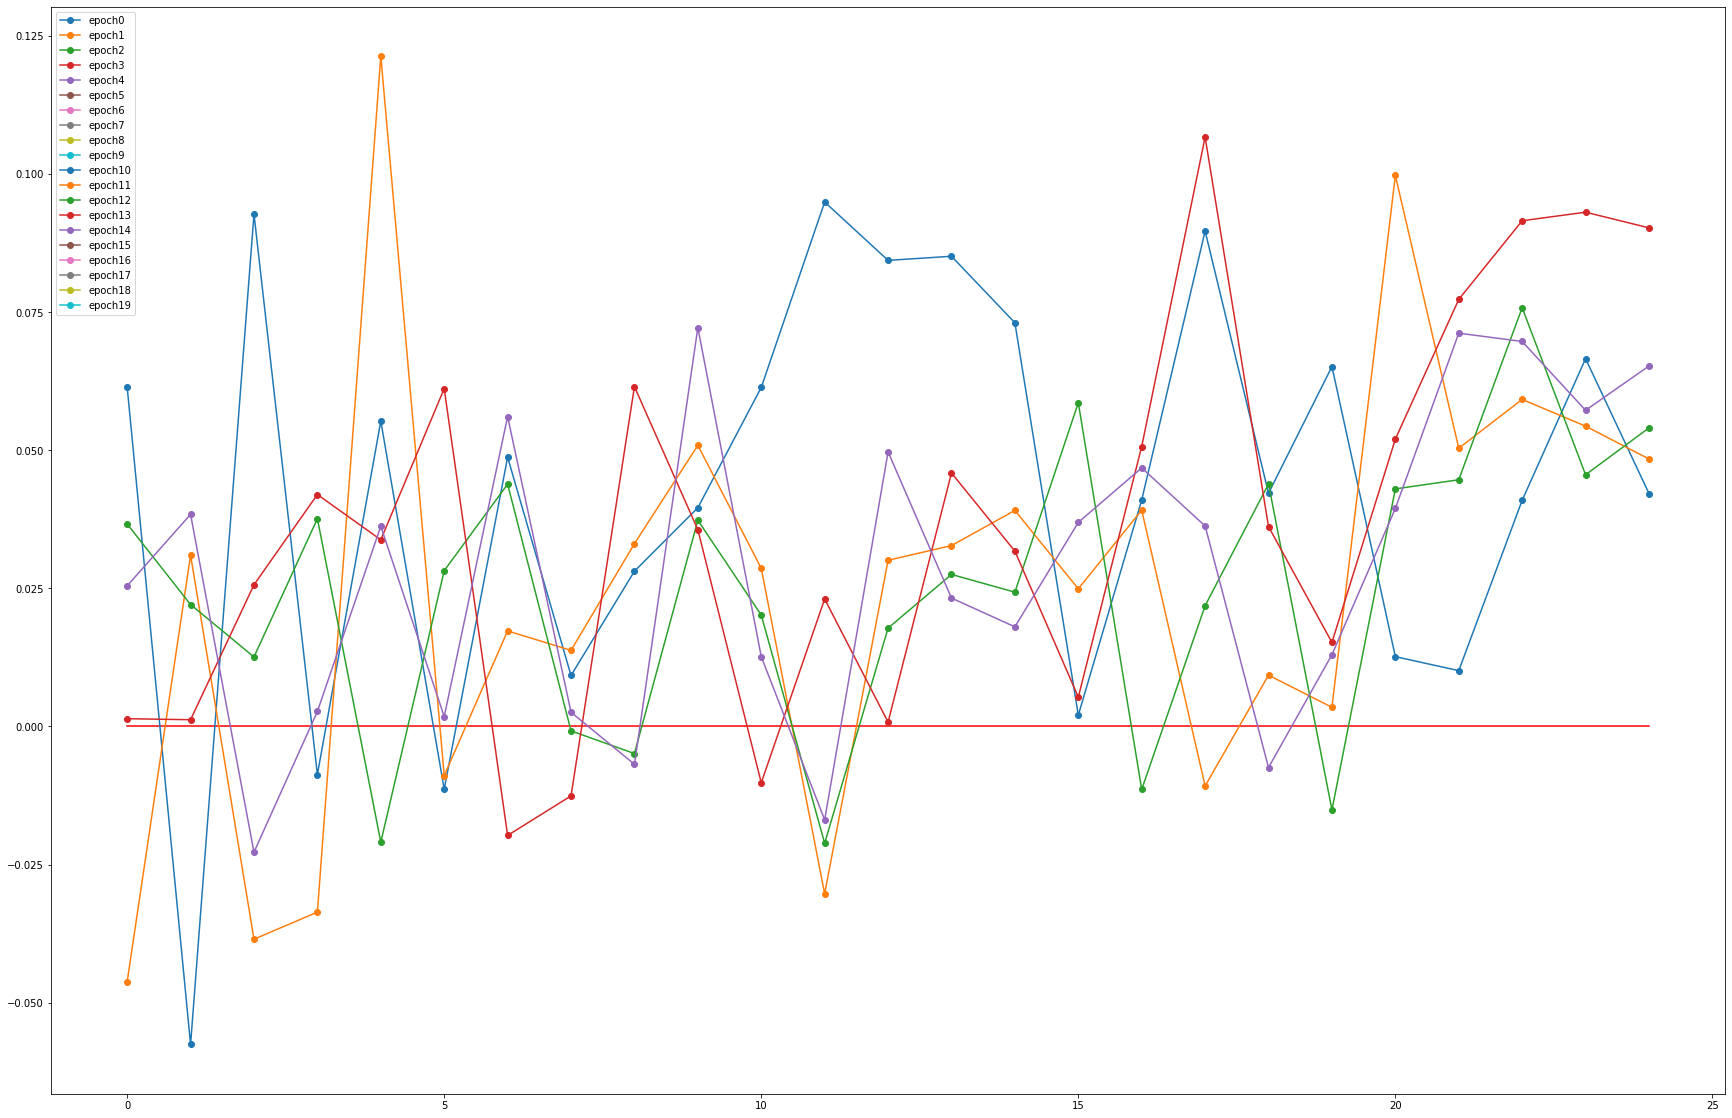

4:x2@


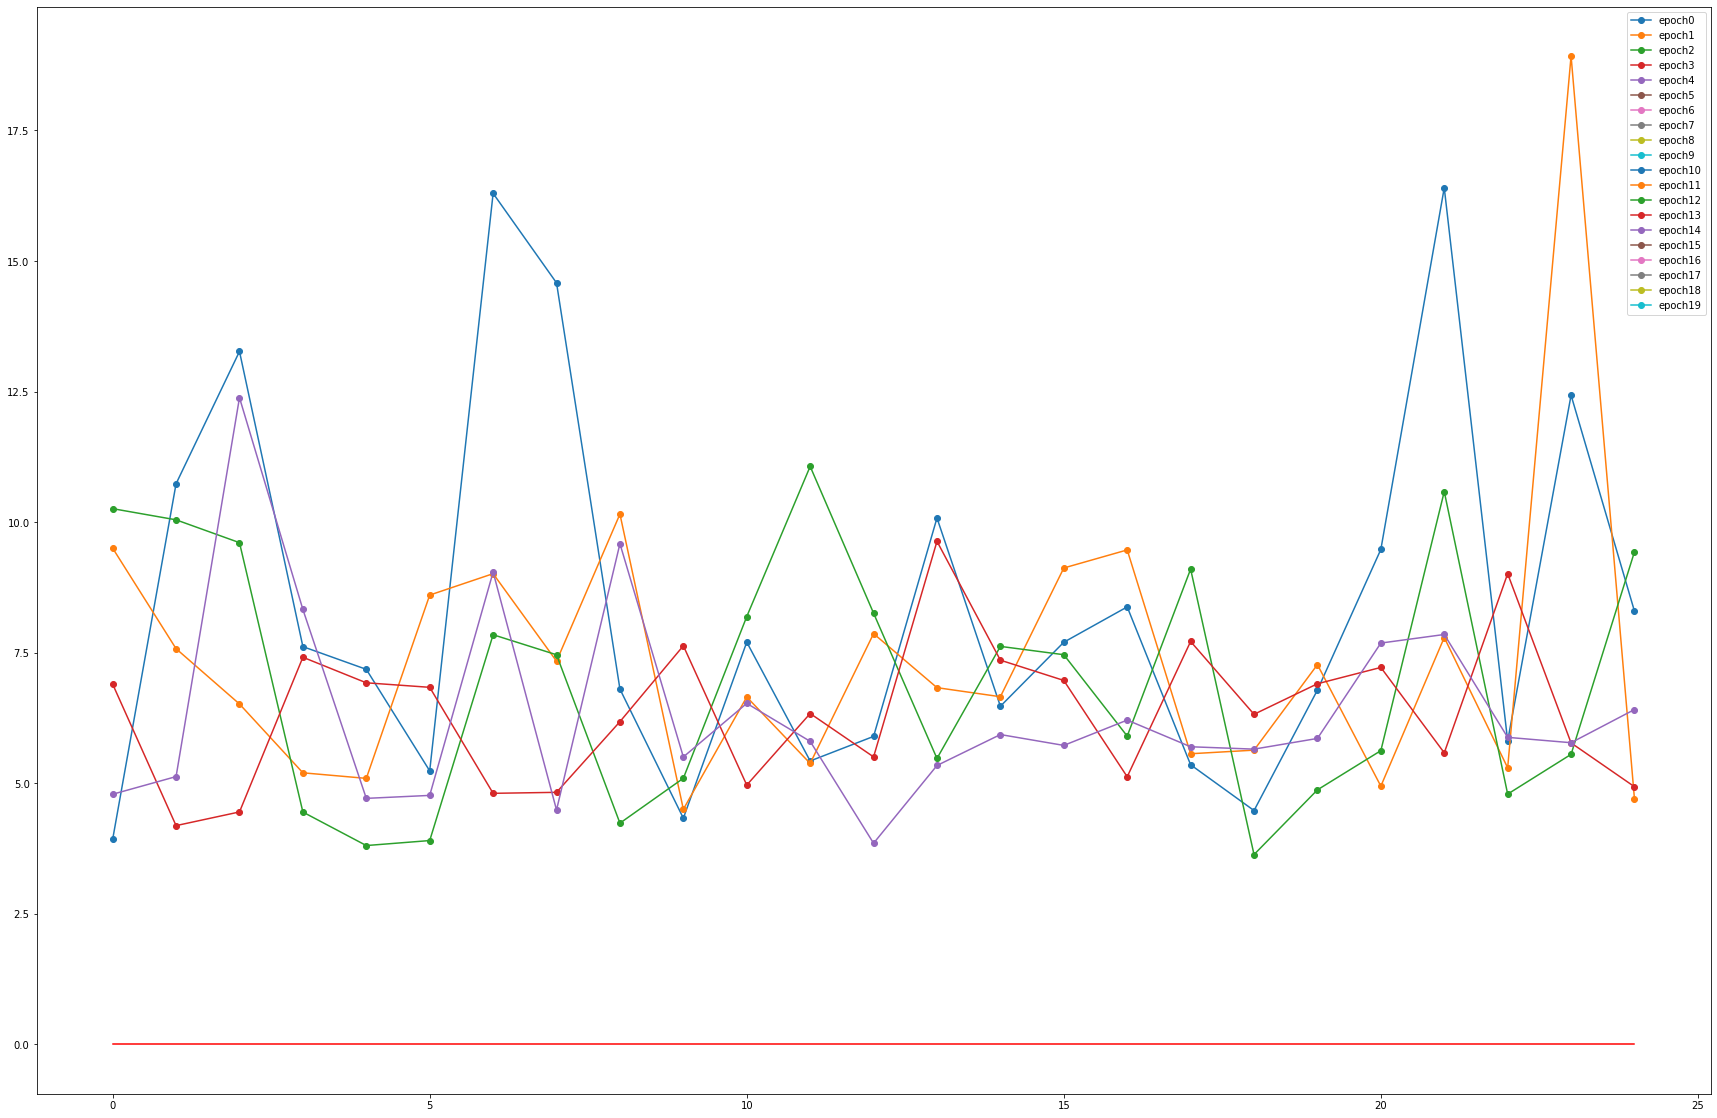

5:F


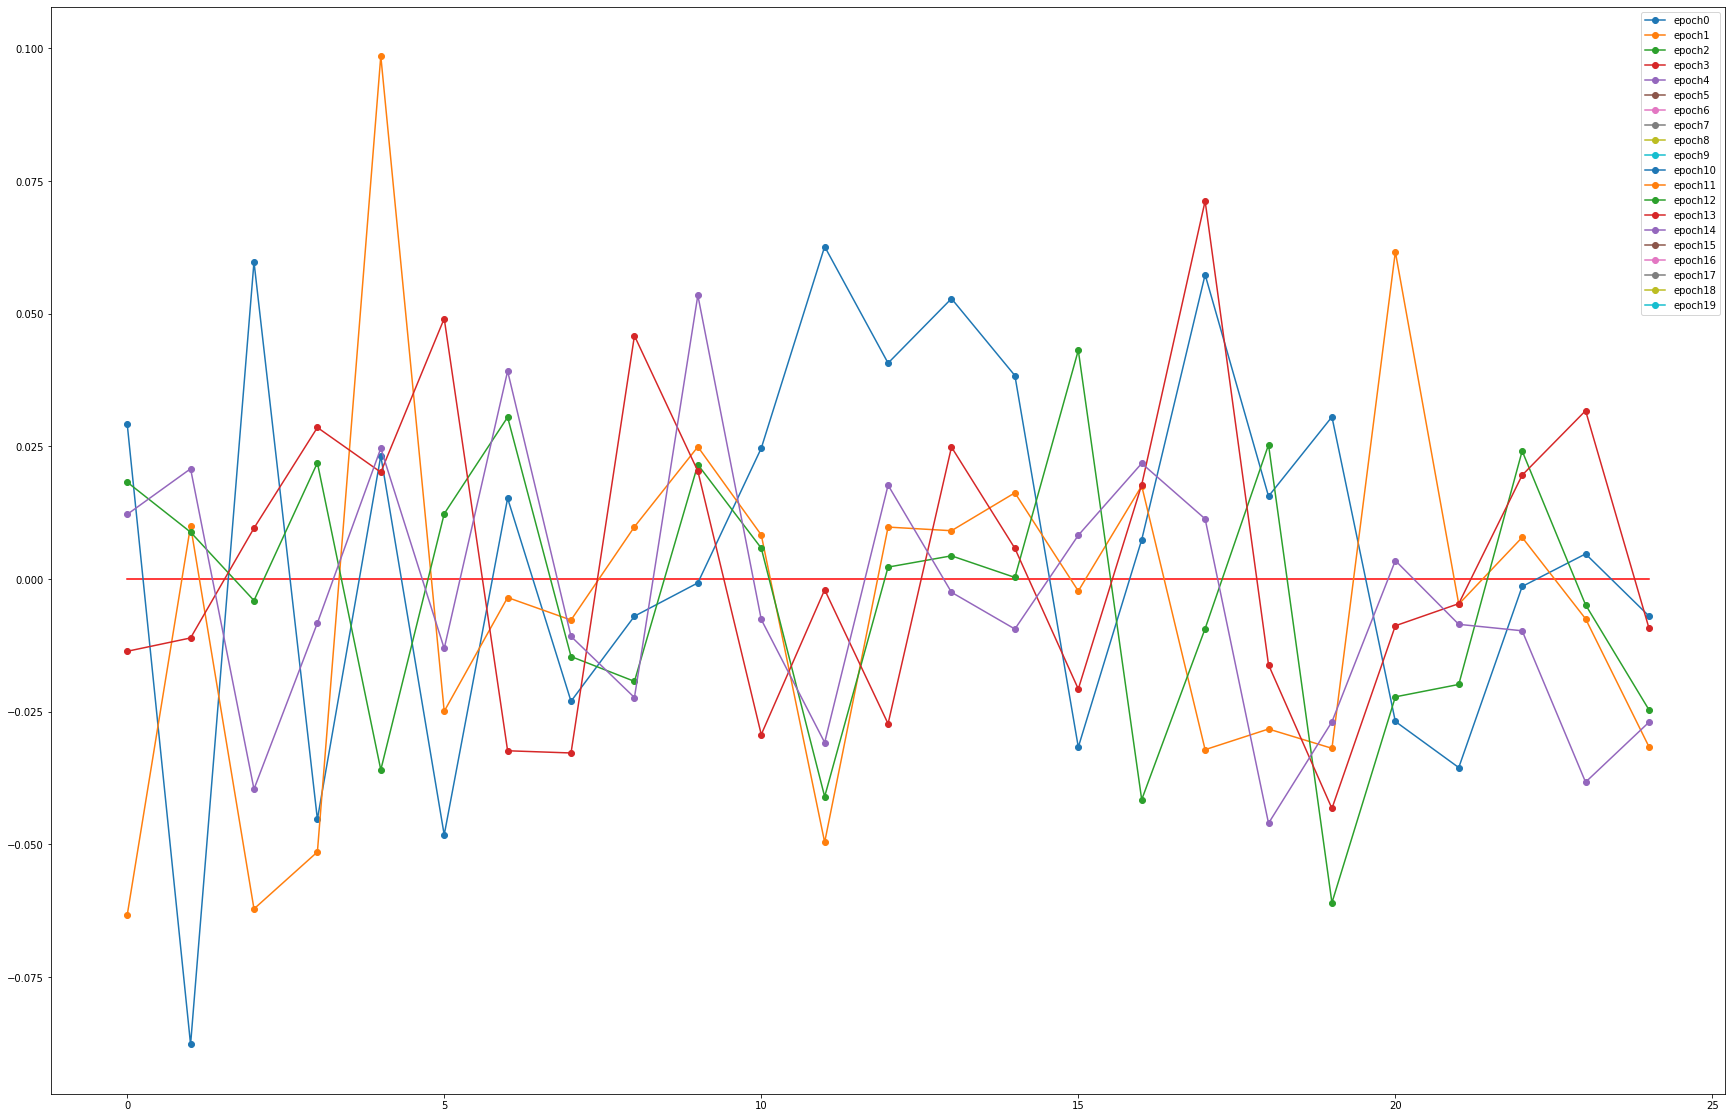

In [7]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["TUR_lhs"]/TUR_log["rhsA(F)."+str(i)],generate_num=generate_num)
    plt.show()

# 異なるサンプル手法A,B,Vの比較

## V/A

0:tflatten(torch.ones(x.shape.cuda(


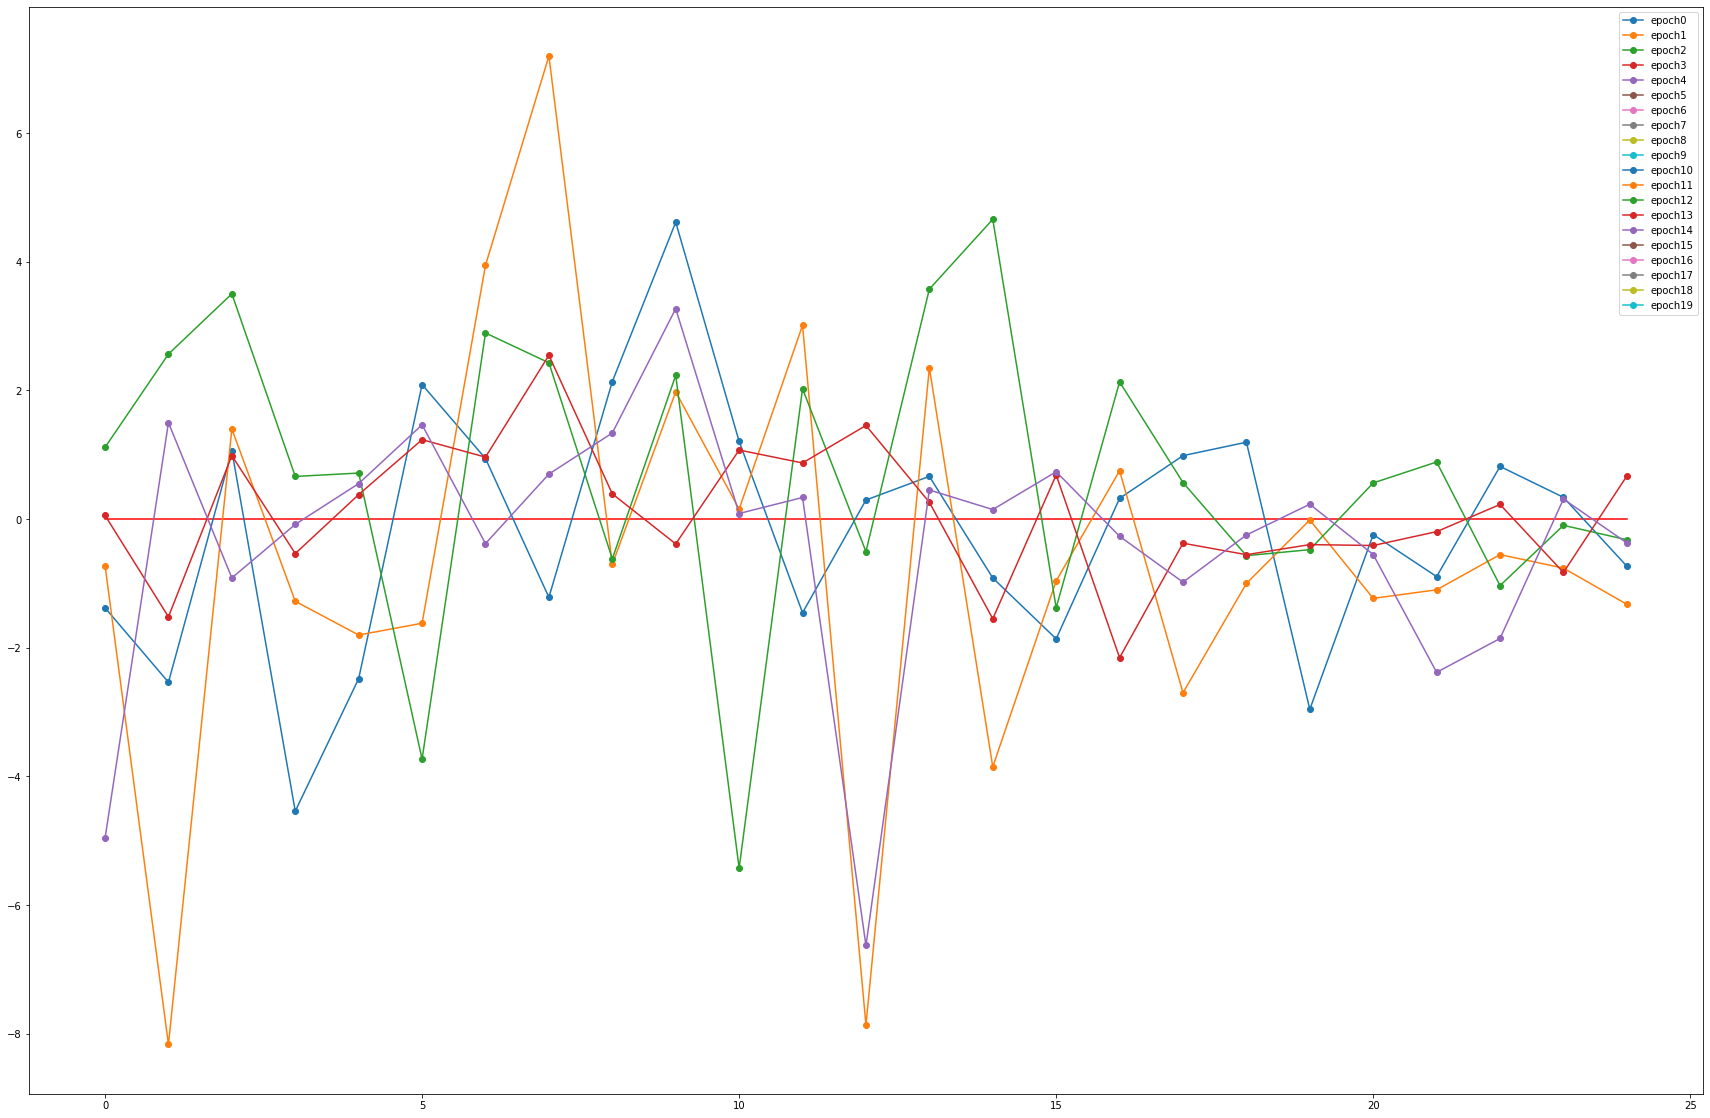

1:xf@


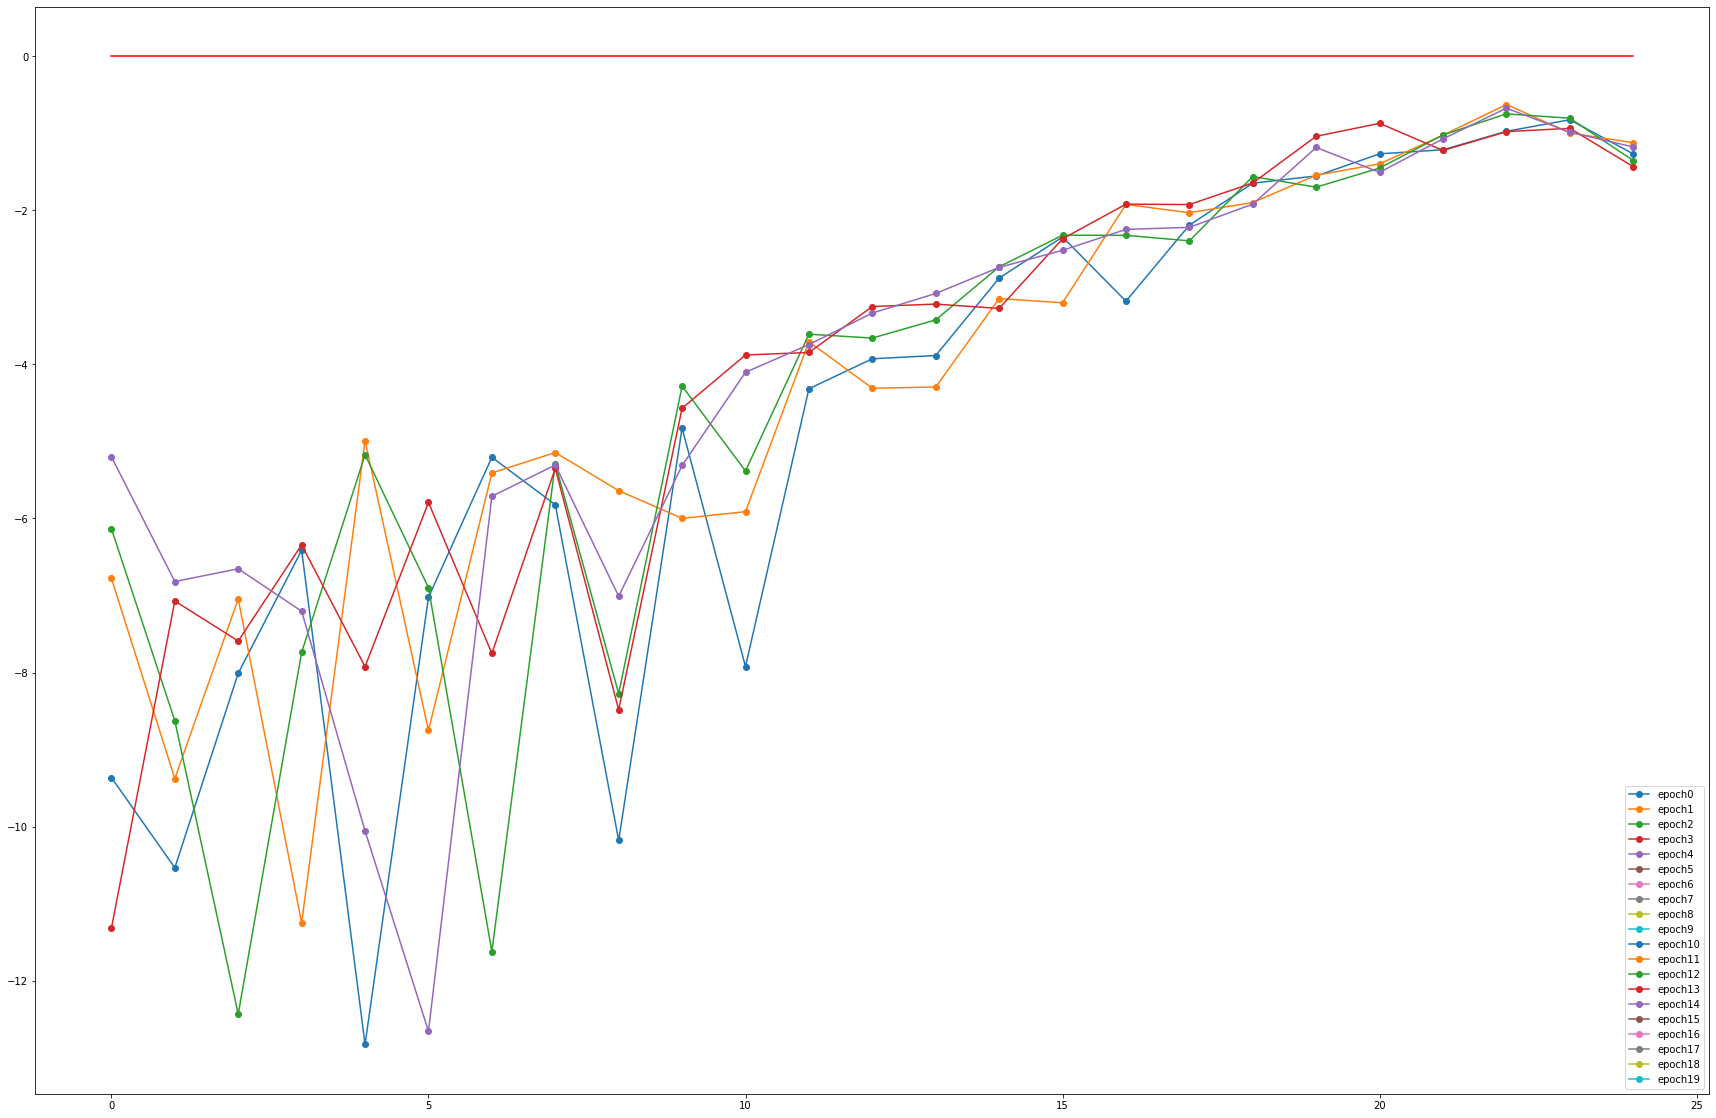

2:-xf2@


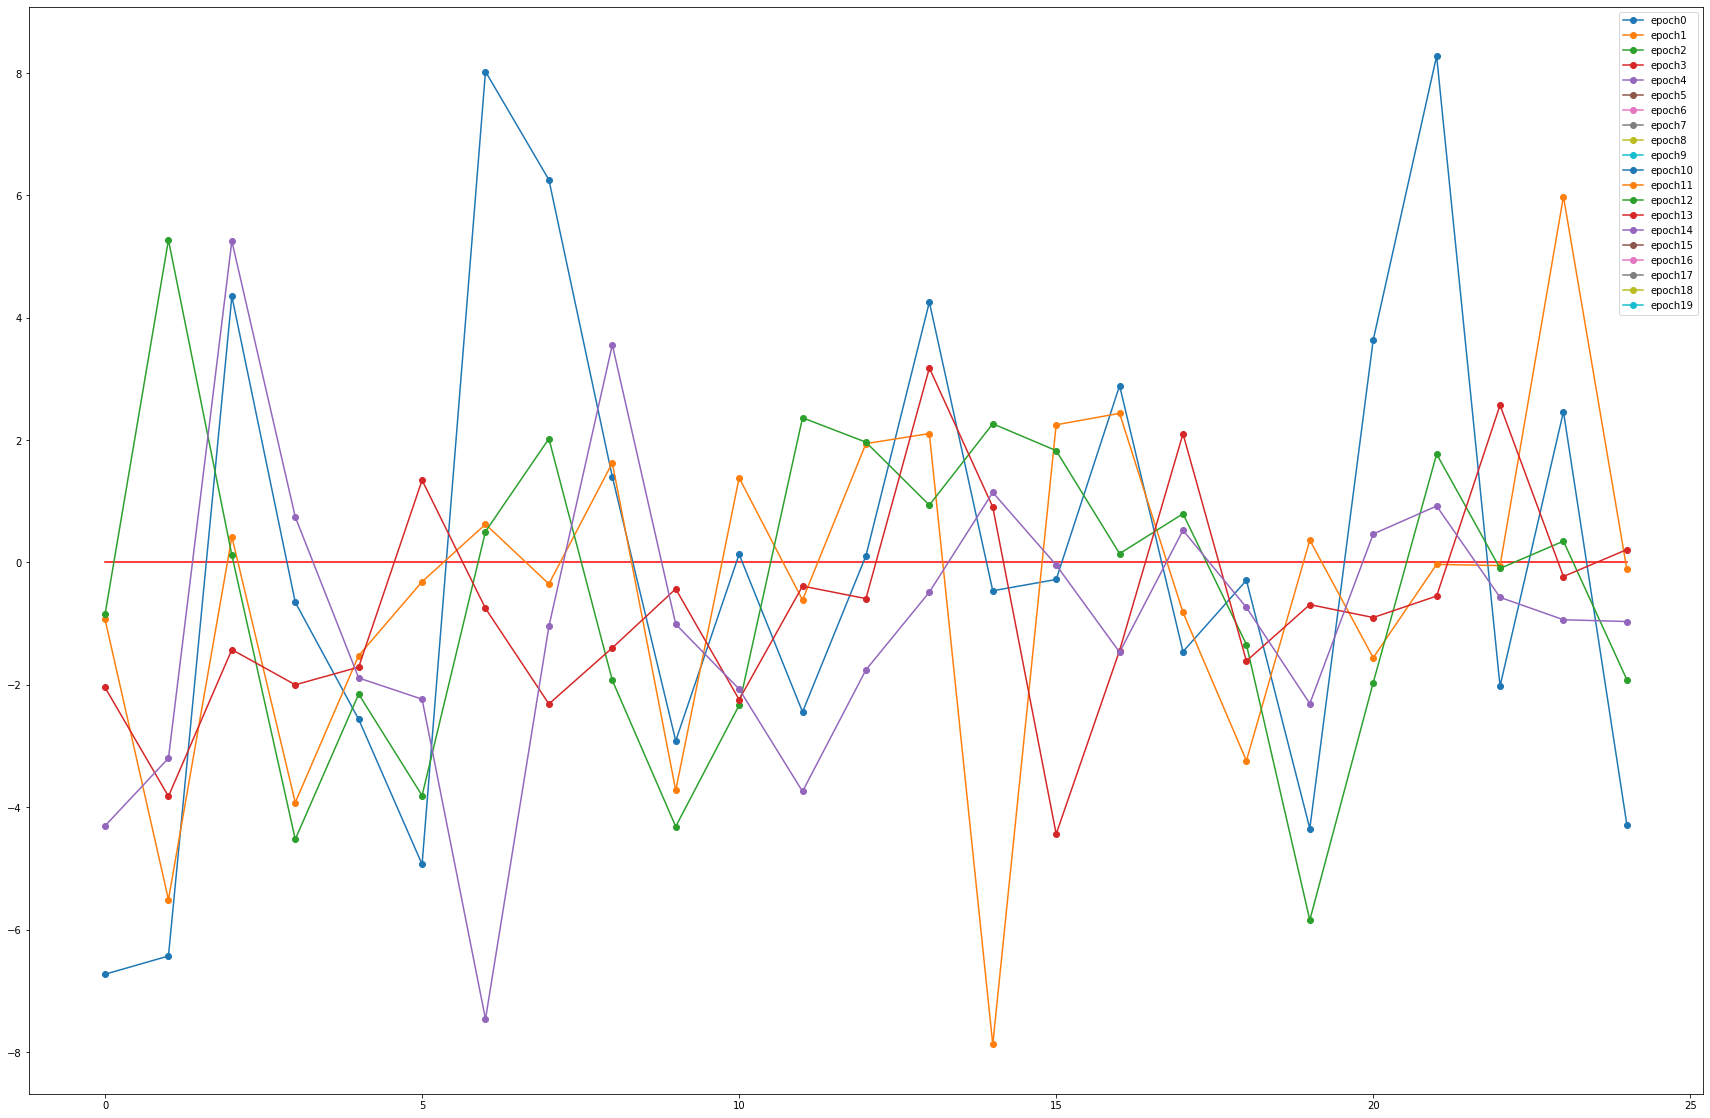

3:x@


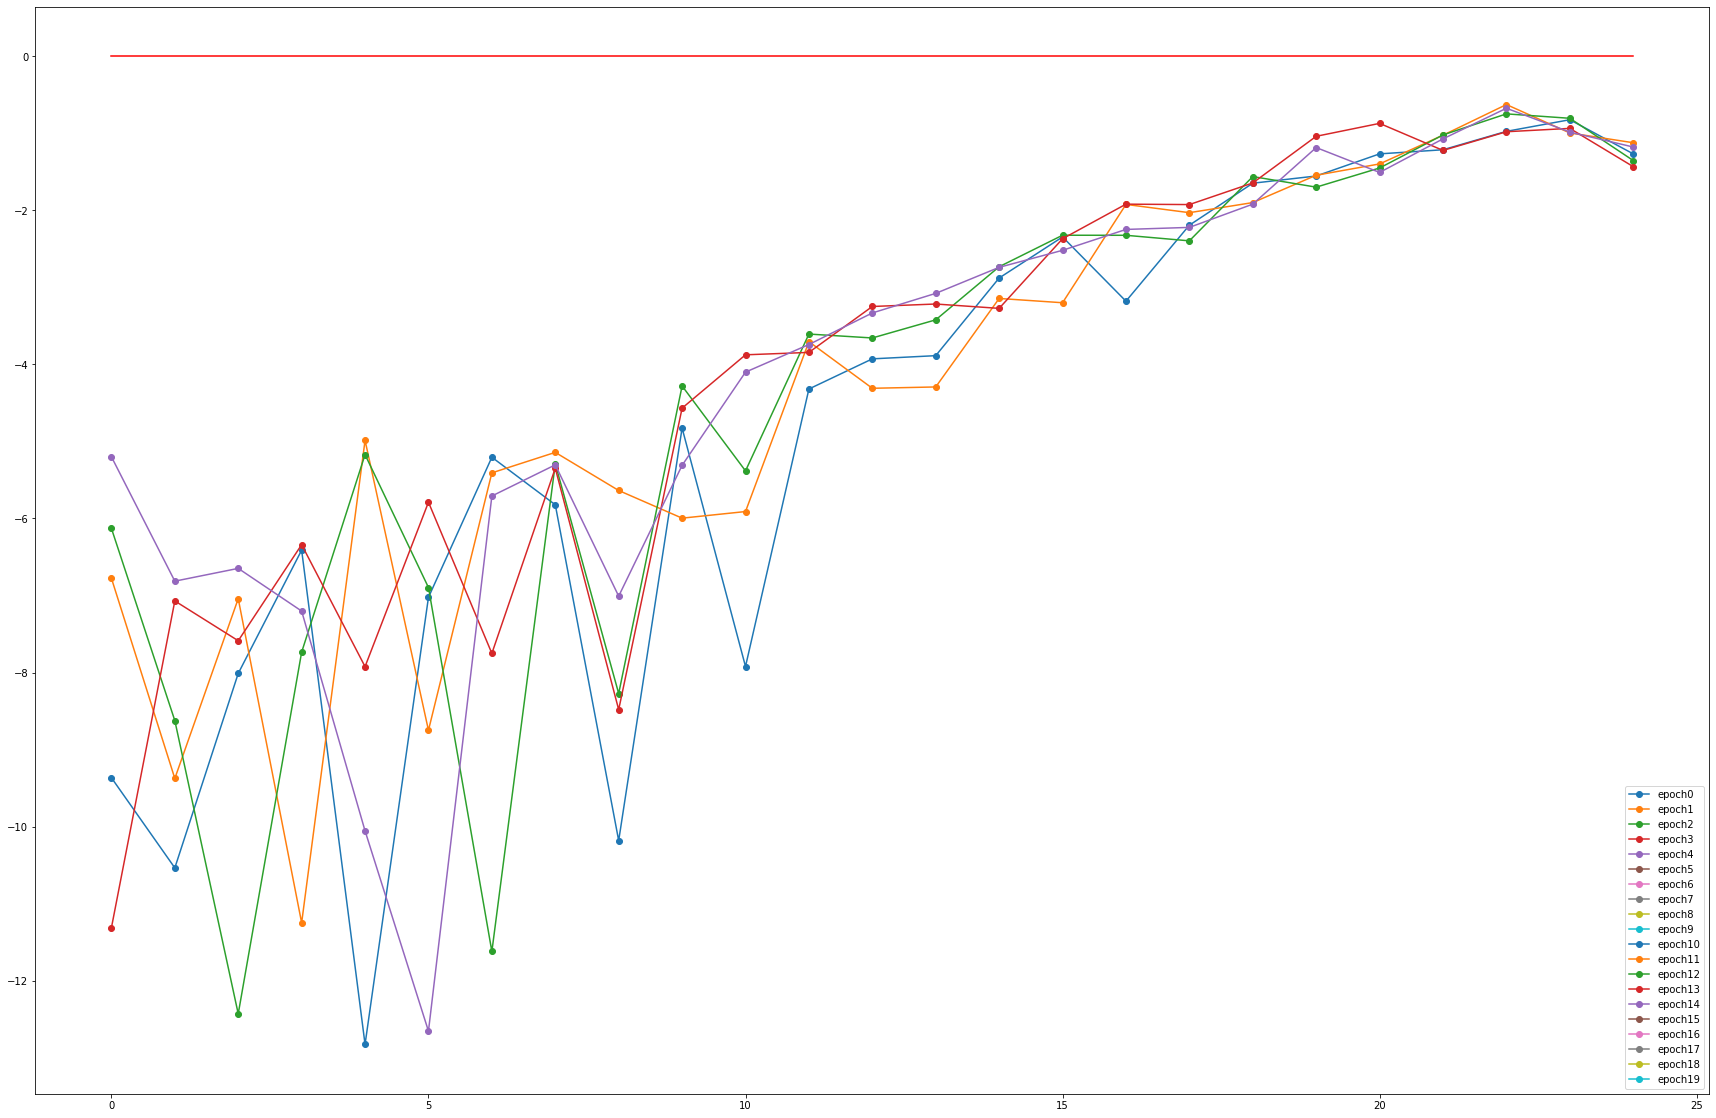

4:x2@


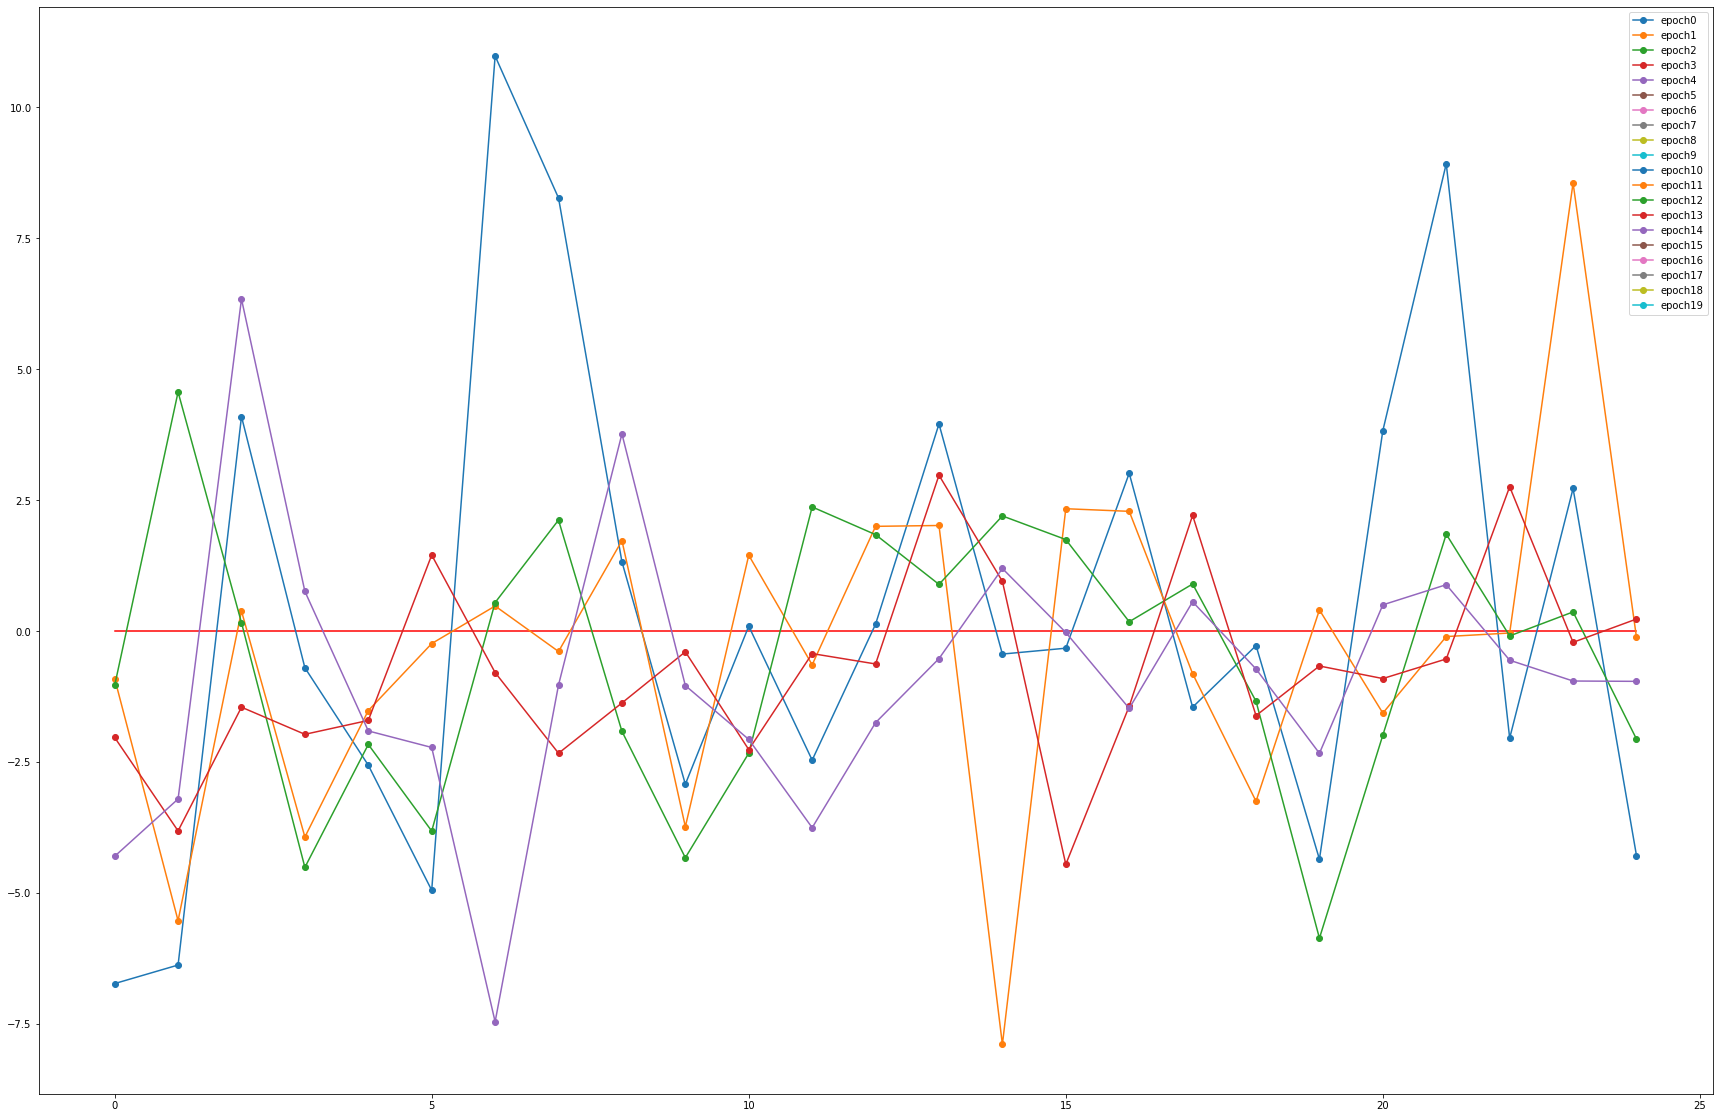

5:F


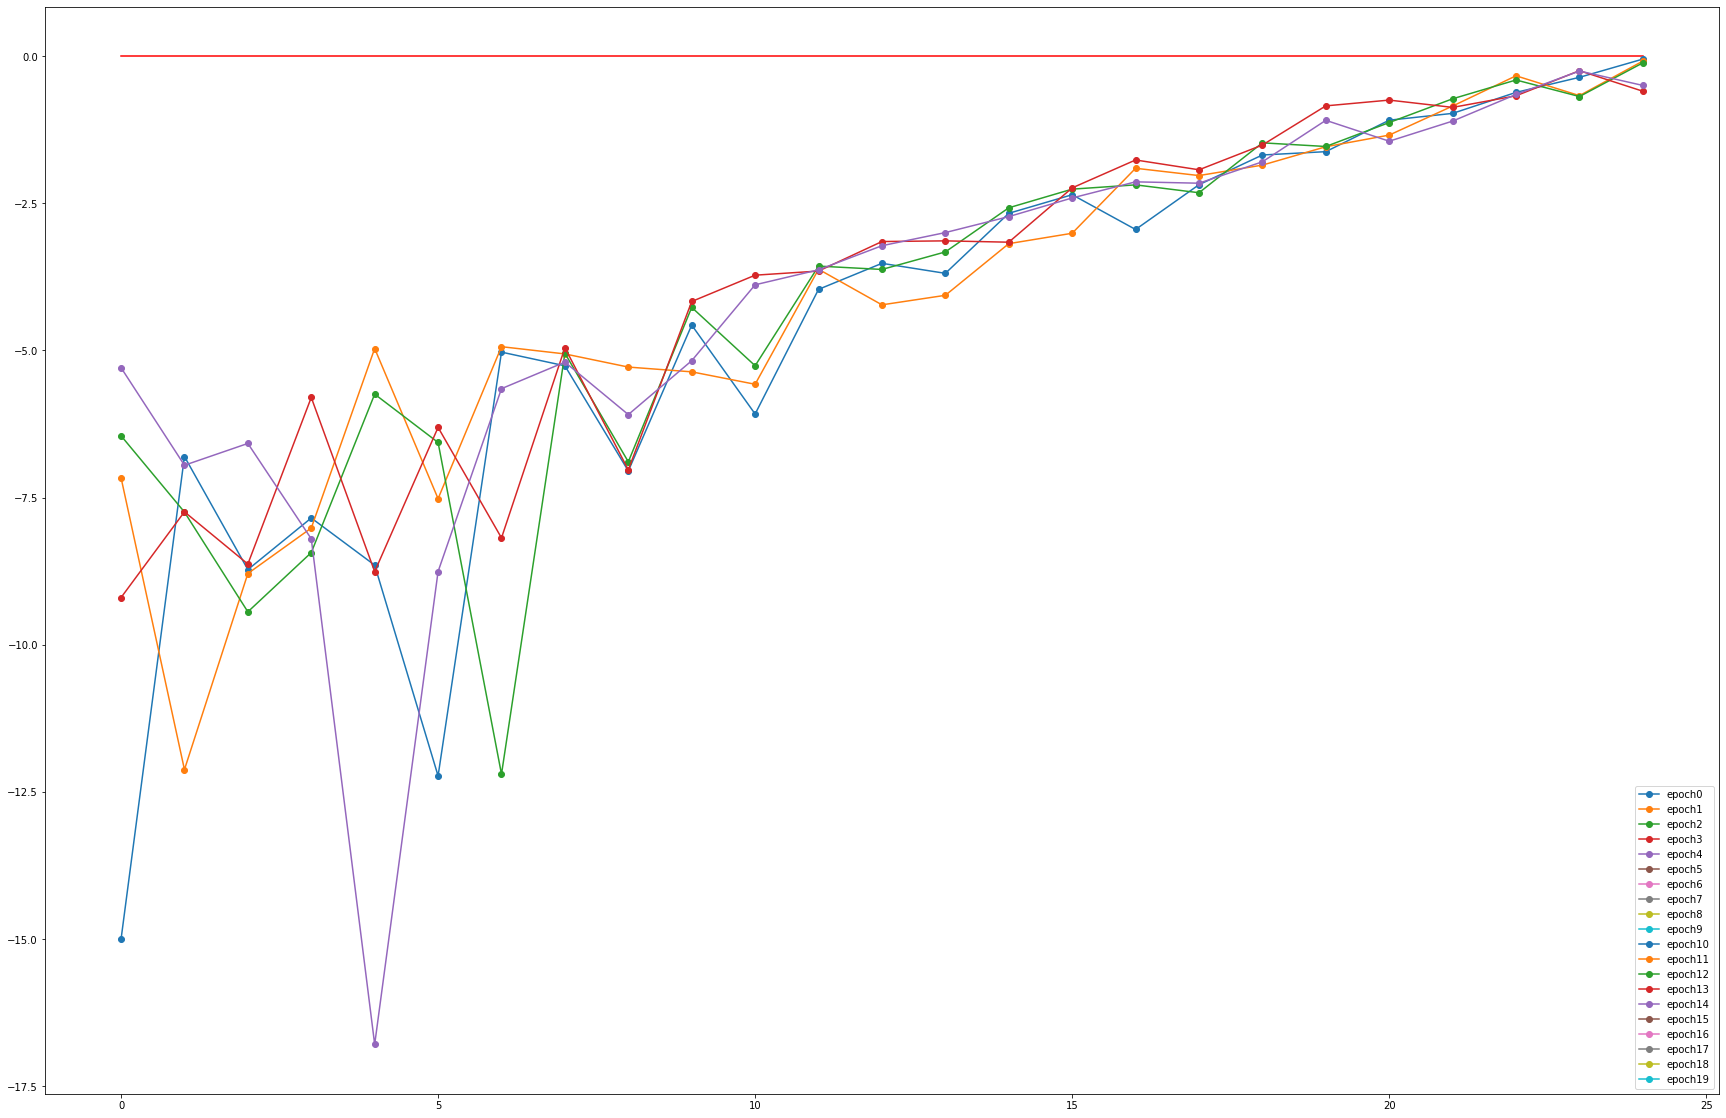

In [8]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["rhs."+str(i)]/TUR_log["rhsA(F)."+str(i)],generate_num=generate_num)
    plt.show()

## A/B

0:tflatten(torch.ones(x.shape.cuda(


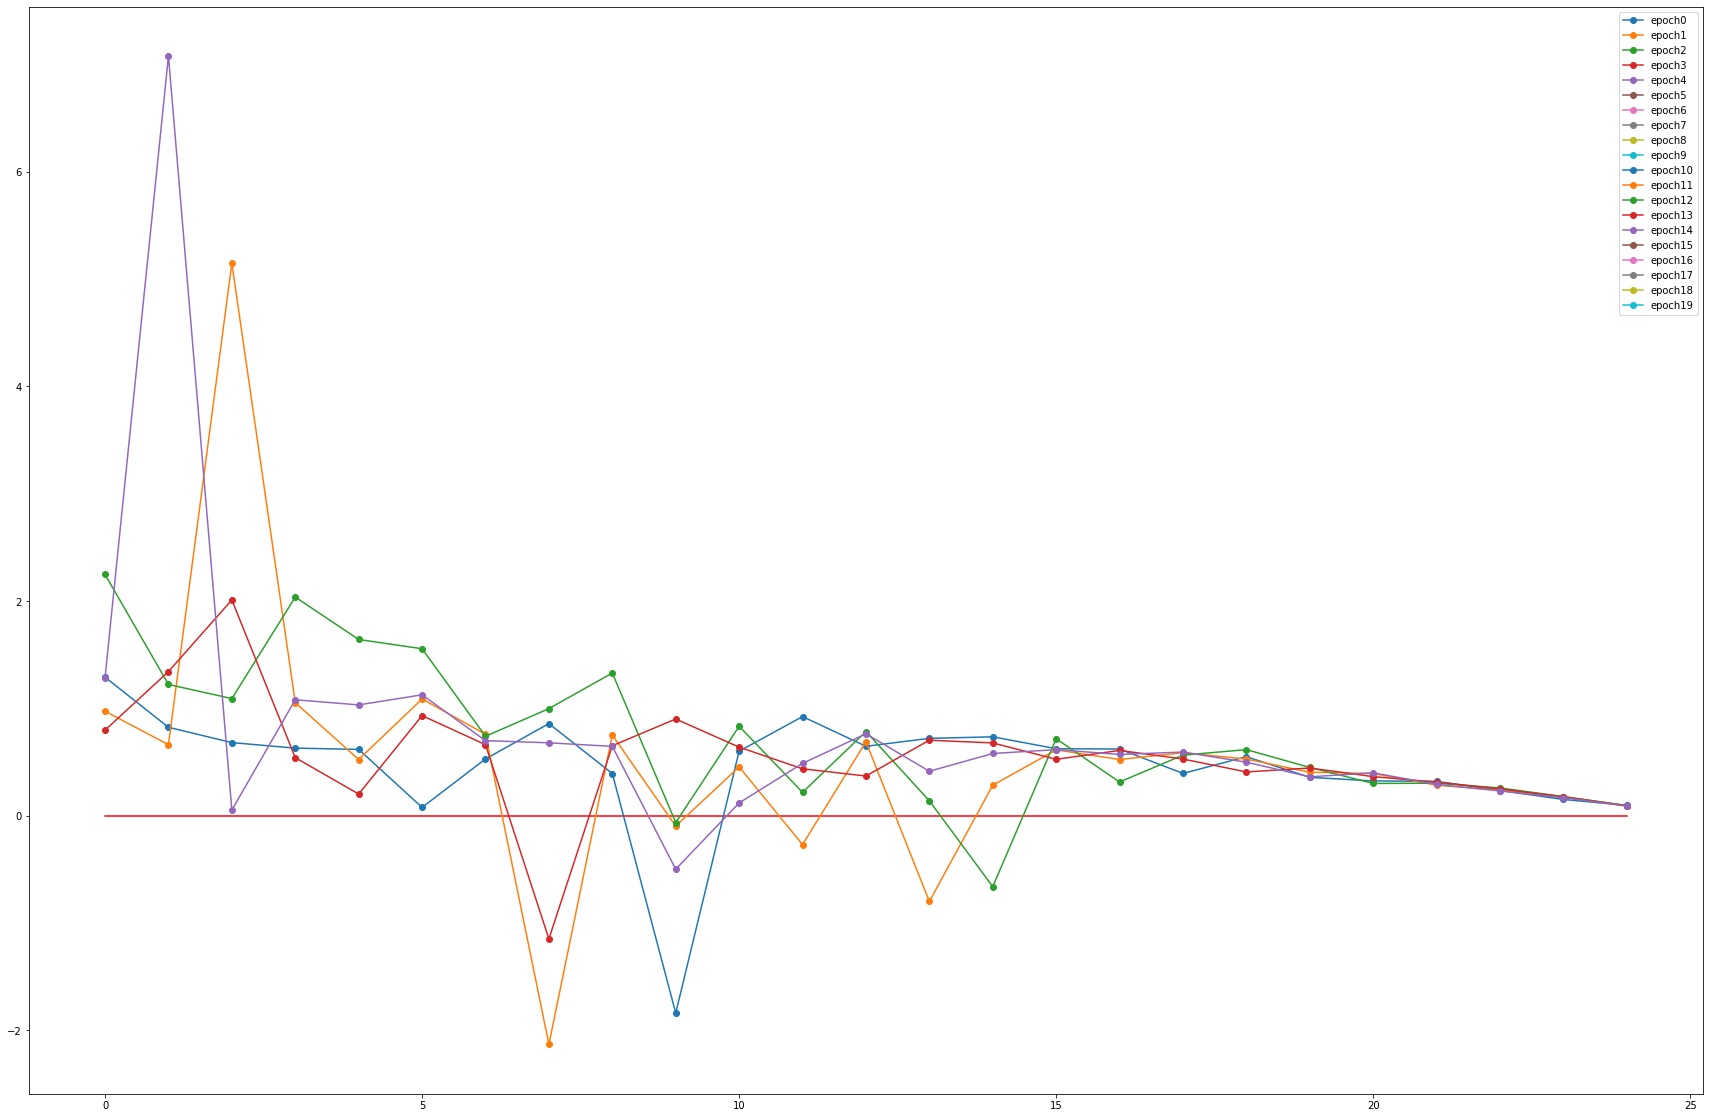

1:xf@


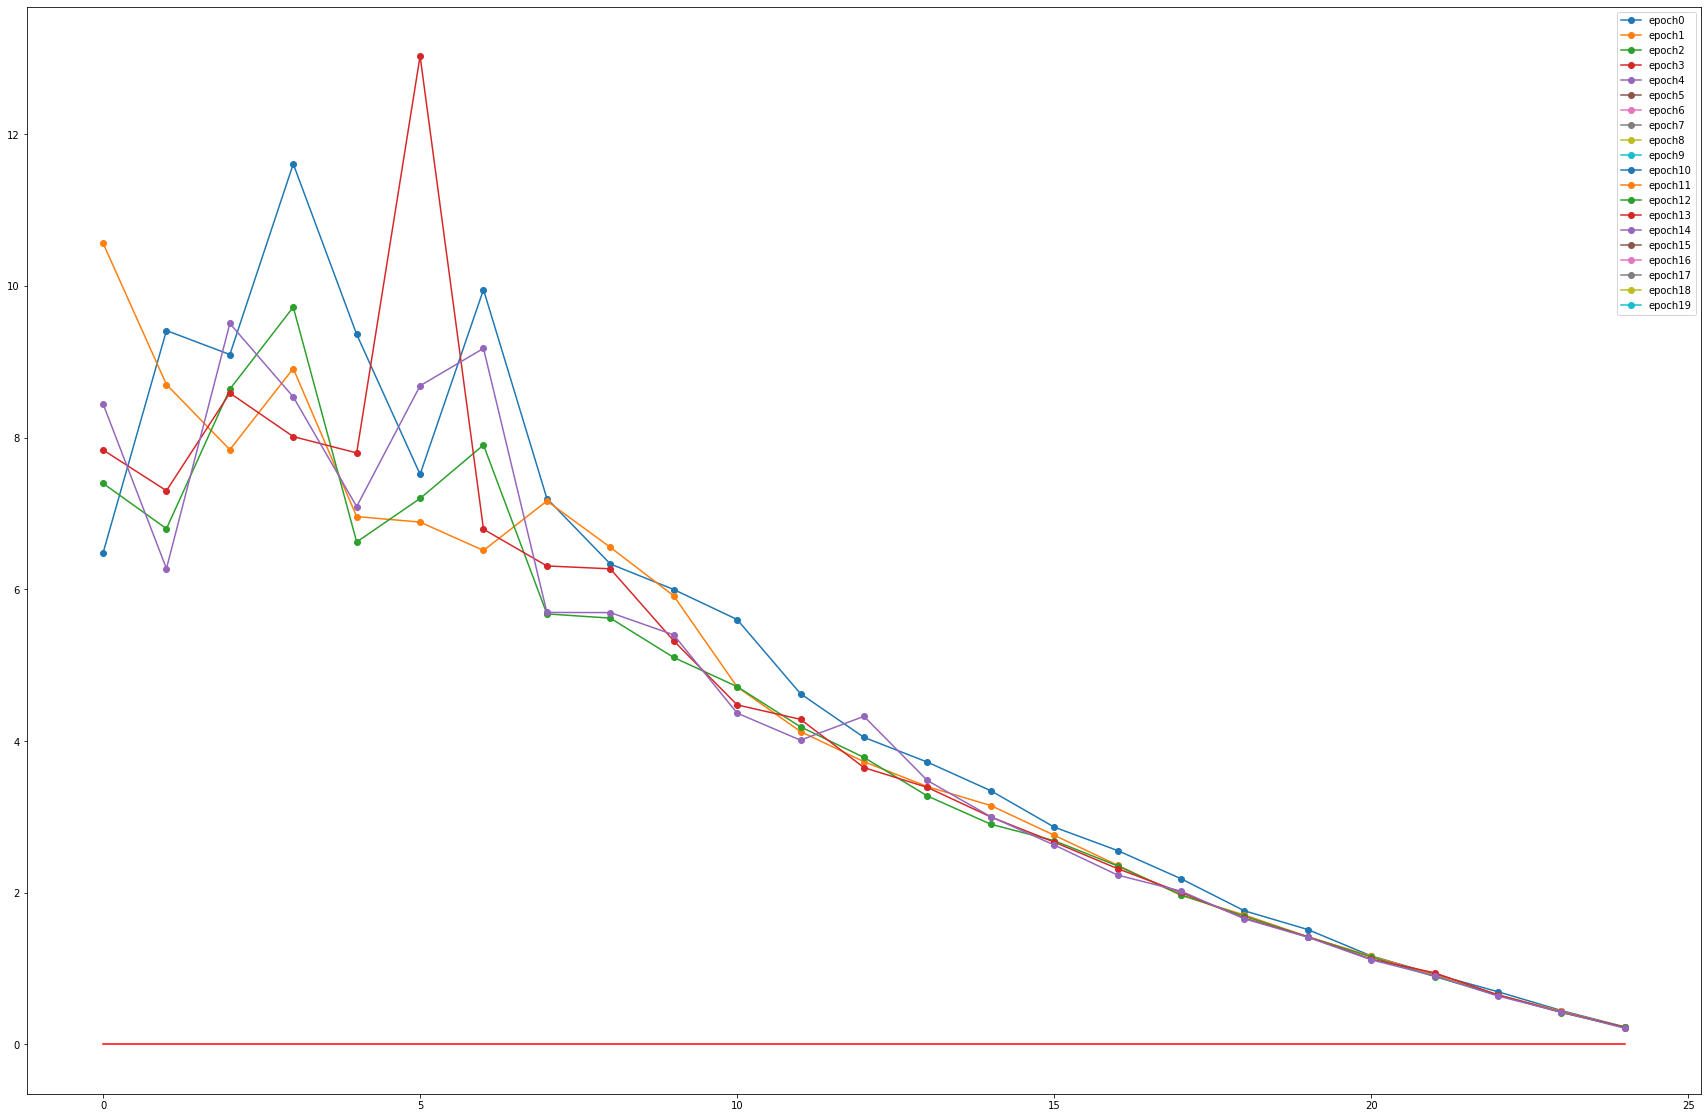

2:-xf2@


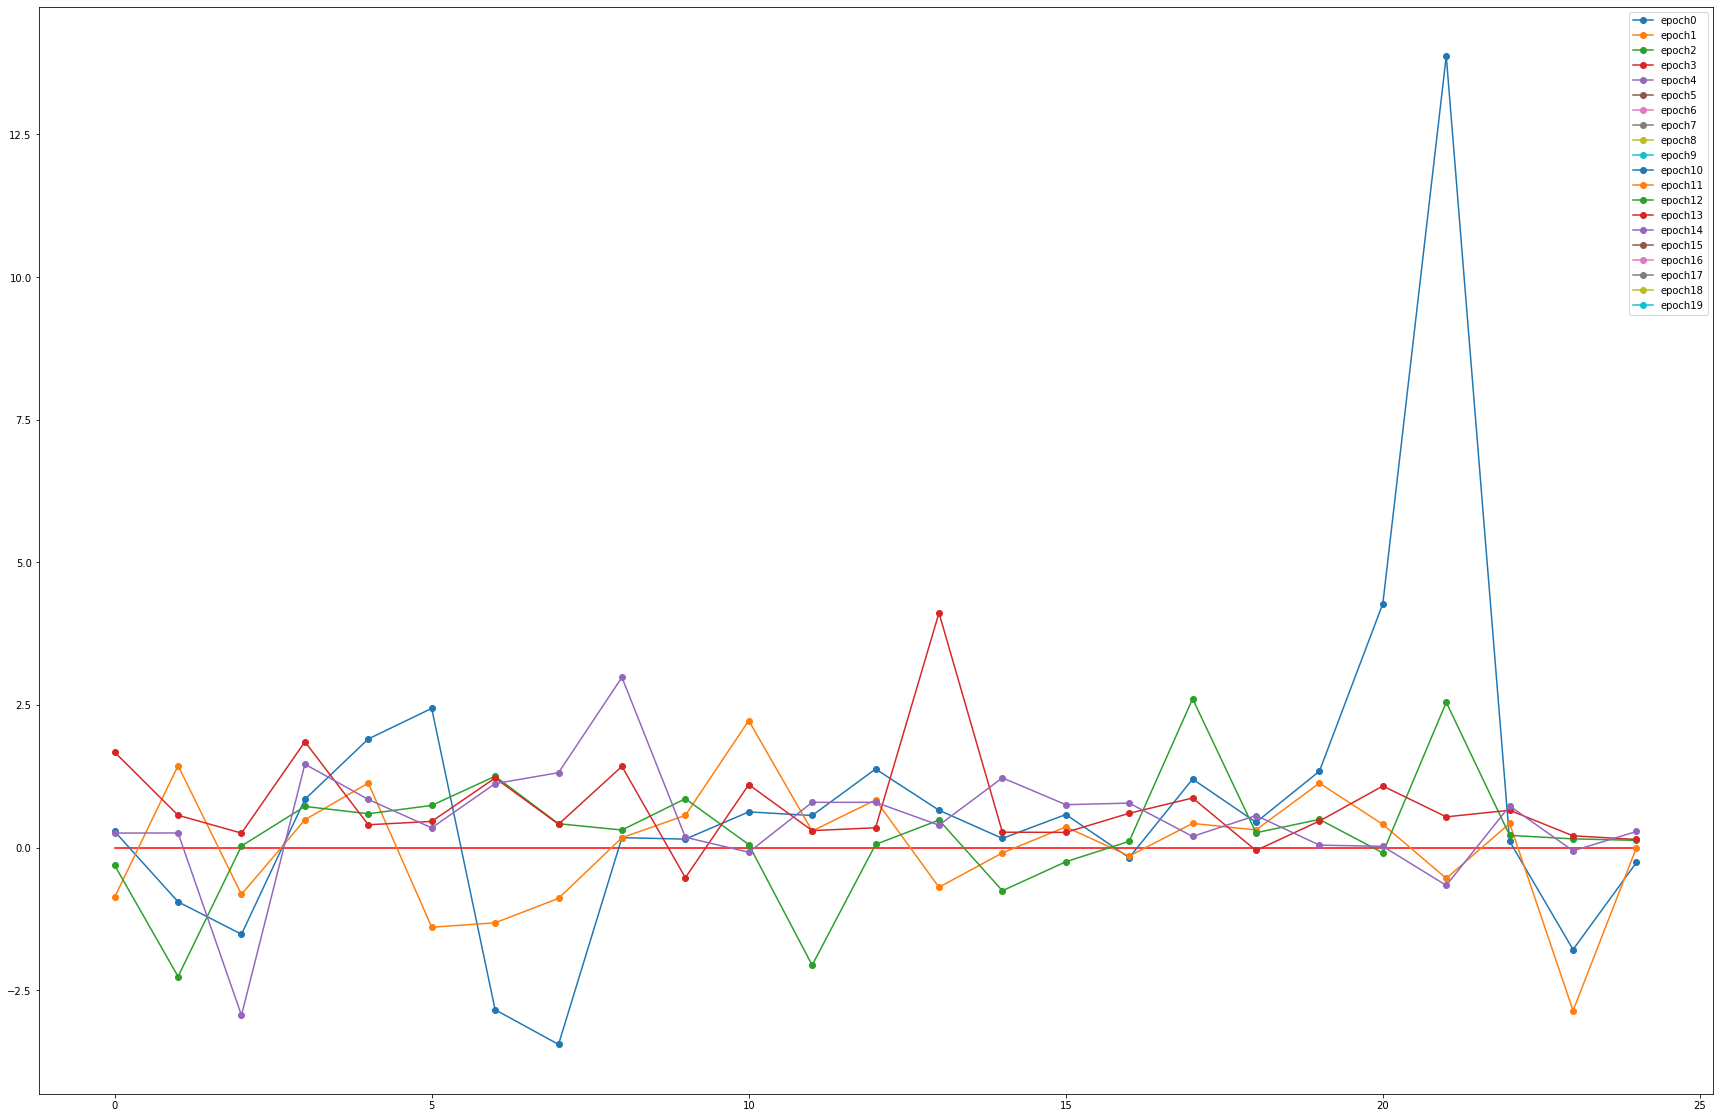

3:x@


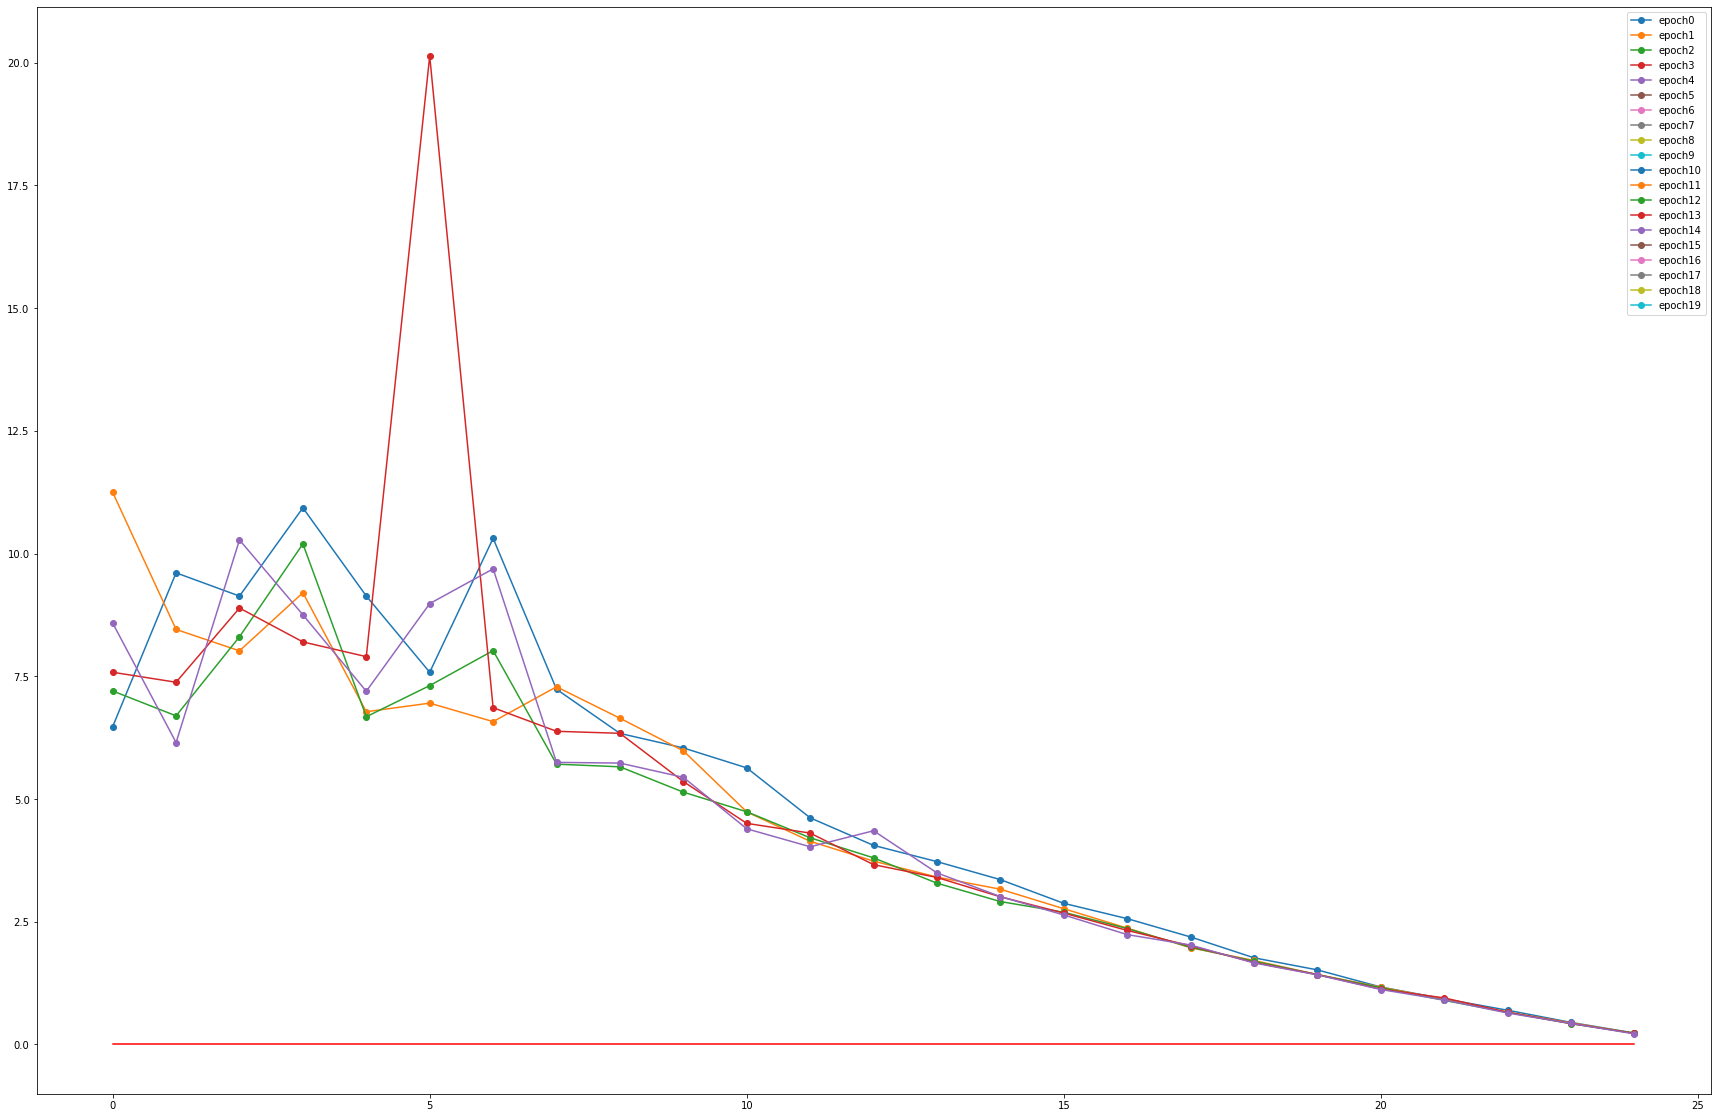

4:x2@


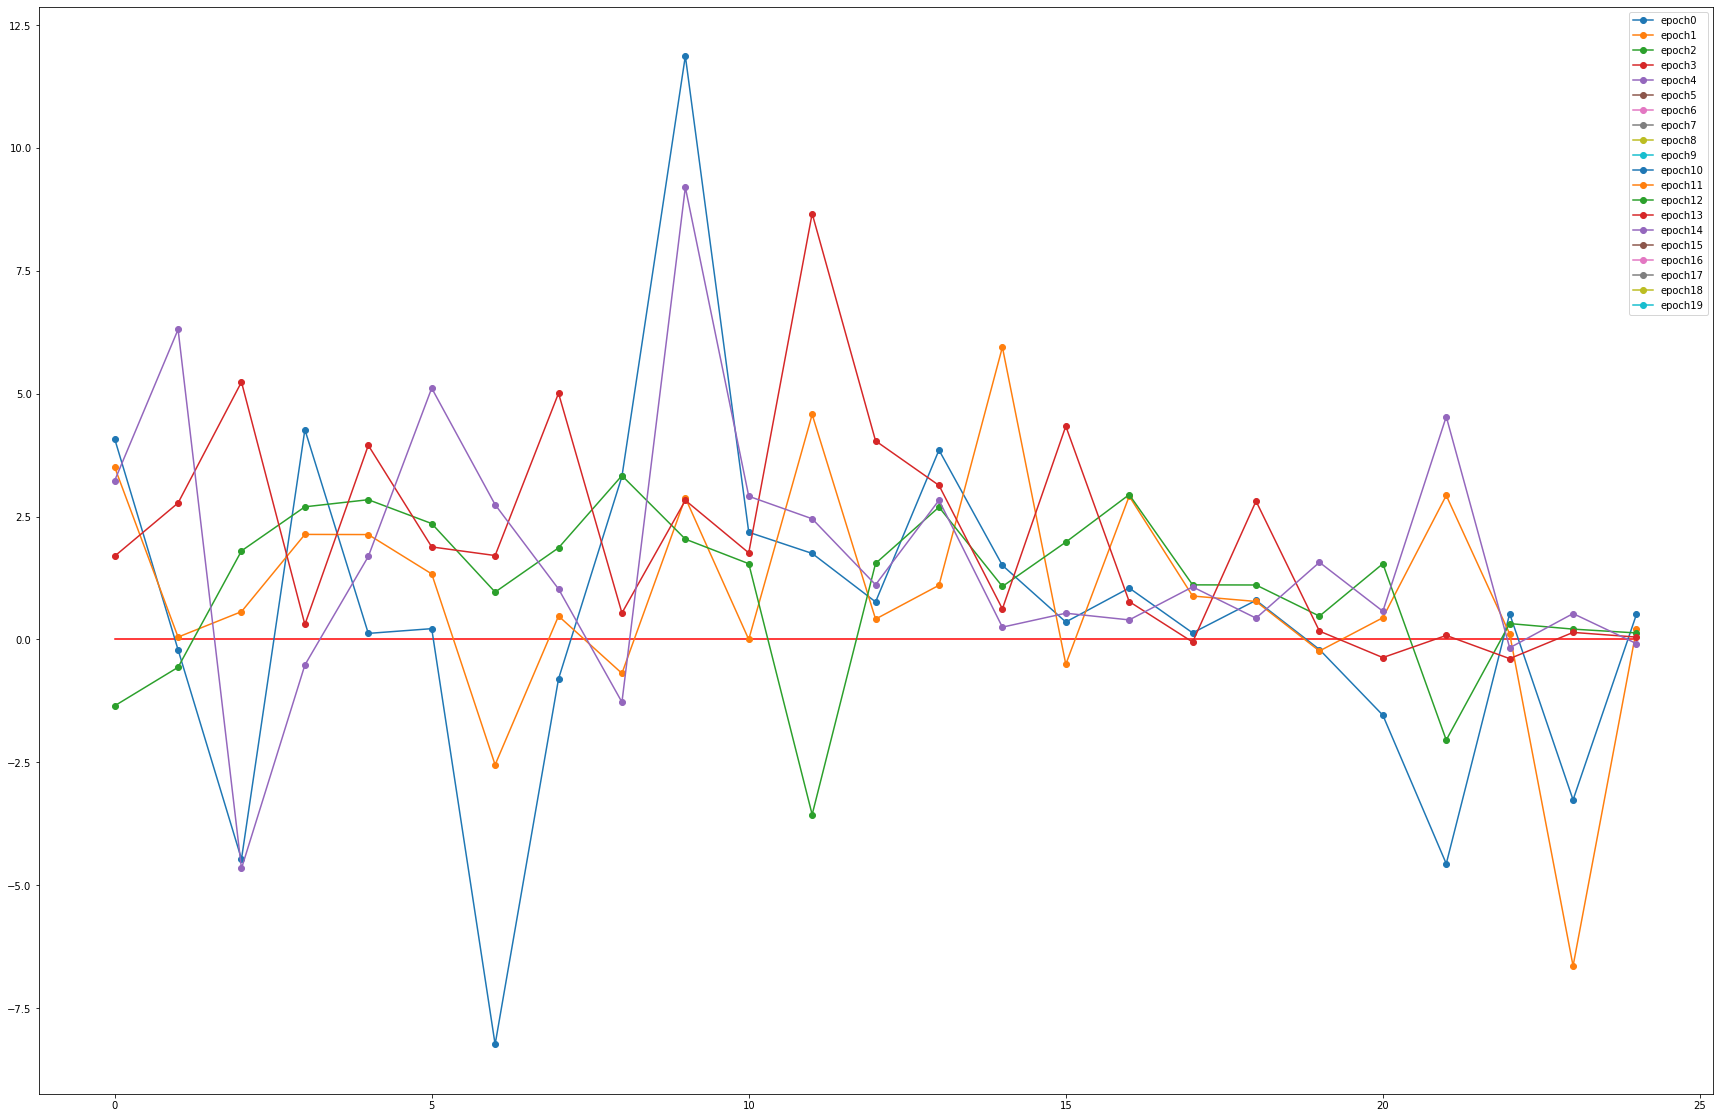

In [9]:
for i in range(5):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["rhsA(F)."+str(i)]/TUR_log["rhsB(df)."+str(i)],generate_num=generate_num)
    plt.show()

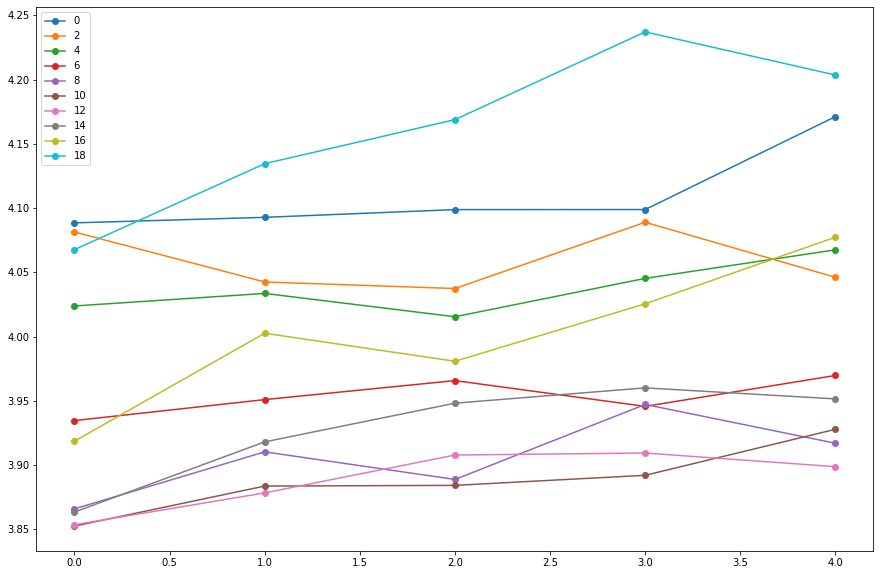

In [10]:
pl.plot_per_epoch(TUR_log["TUR_lhs"],generate_num=generate_num)